# Lab session 1: Introduction to time-frequency analysis
---
## Representation of signals & inverse problems - G1-G2
---

This practical session consists in a series of 6 short exercises introducting the time-frequency analysis of sounds (acoustic signals).

## Before you start...
Carefully read the instructions below before starting the lab.

* Place the `.zip` archive in a local folder (Computer -> Documents\TDS\).
* Unzip the `.zip` archive.
* Rename the folder as `TP1_Name1_Name2`.
* Duplicate the provided notebook file, and rename it `TP1_Name1_Name2.ipynb`.
* If needed, an excellent tutorial on the use of Python for scientific computing can be found in the [Scipy lecture notes](https://scipy-lectures.org/).
<!-- * Download the `.zip` folder `sounds` from moodle, and extract it in the same directory as `TP1_Name1_Name2.ipynb` file. -->

_Remark: some of the Python modules used in this lab session and in the provided module_ **module_TDS.py** are:

* the `numpy.fft` package, providing implementation of the standard Fourier transforms and related tools:
https://docs.scipy.org/doc/numpy/reference/routines.fft.html
* the `scipy.signal` package, containing several functions to perform various operations on signals:
https://docs.scipy.org/doc/scipy/reference/signal.html#module-scipy.signal

## Configuration 

In [1]:
from module_TDS import *

Loading BokehJS ...

In [2]:
from scipy.signal import *
from scipy.io.wavfile import *
from scipy.io import *
from numpy.fft import *
from matplotlib.colors import LogNorm # for Log normalization
import numpy as np
import matplotlib.pyplot as plt

# to install sounddevice library: type the following code in Anacoda prompt window : pip install sounddevice
import sounddevice as sd

## Contents <a id="content"></a>

1. [Section 1](#section1): Fourier analysis (spectral analysis)
   - [Exercise 1](#ex1) 
2. [Section 2](#section2): Fourier analysis of segments
   - [Exercise 2](#ex2) 
   - [Exercise 3](#ex3) 
3. [Section 3](#section3): Introduction to time-frequency analysis 
   - [Exercise 4](#ex4) 
4. [Section 4](#section4): Analysis of some signals
   - [Exercise 5](#ex5) 
   - [Exercise 6](#ex6) 
5. [Appendix](#appendix): Time-frequency atoms using a Hanning window
   - contains useful code examples

---
## Section 1: Fourier analysis (spectral analysis) <a id="section1"></a> [[back to top]](#content)

### Reading, displaying, listening to a signal

#### Reading
Signals can be represented as 1D vectors, stored as a row or a column vector.

You can access the help of a specific Python function by pressing `Maj+Tab+Tab` when the cursor is on the desired function.

Examples of availables sound signals are (see folder `sounds\`):

* bird.wav
* glockenspiel_mono.wav
* aleluya.wav
* desactive_mono.wav
* ...

The following instruction reads a signal from a `.wav` file (song of a bird), before we can listen to it or display it. (see the `sounds\` folder for more examples)

In [3]:
fs, x = read('sounds/bird.wav')

`fs` is the sampling frequency. You can check its value before going on.

#### Listen

In [4]:
sd.play(x,fs)

#### Display

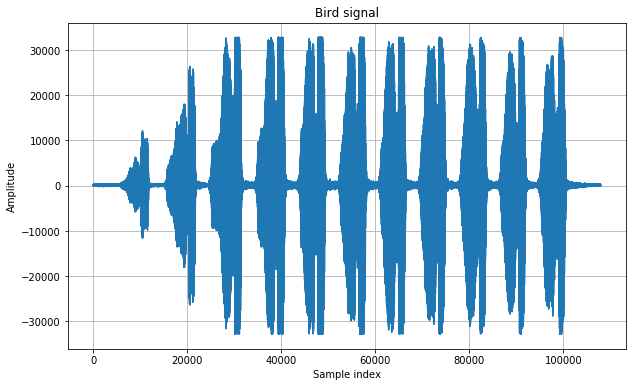

In [5]:
figure(figsize=(10,6))
plot(x)
grid()
xlabel('Sample index')
ylabel('Amplitude')
title('Bird signal')
show()

#### Let's have a look at the time-frequency content of this signal, using its spectrogram (see [Section 3](#Section3)):

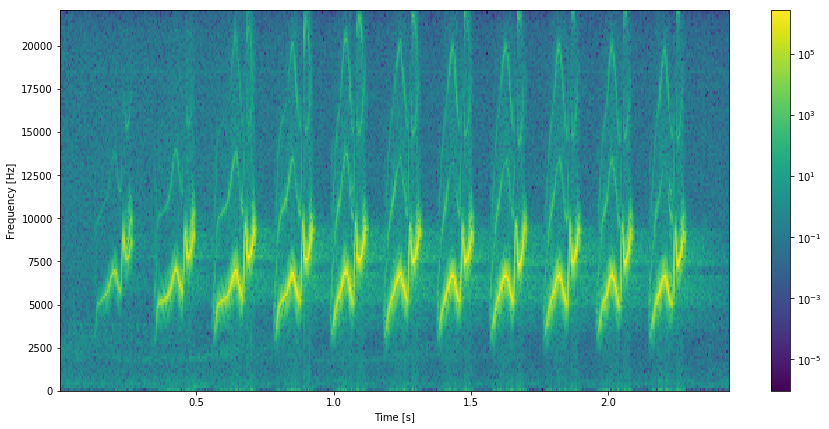

In [6]:
f, t, Sxx = spectrogram(x, fs, nperseg=256)

figure(figsize=(15,7))
pcolormesh(t, f, Sxx, norm=LogNorm())
ylabel('Frequency [Hz]')
xlabel('Time [s]')
colorbar()
show()

One can visualize a small segment of the signal (in the time domain) and observe its oscillatory behaviour:

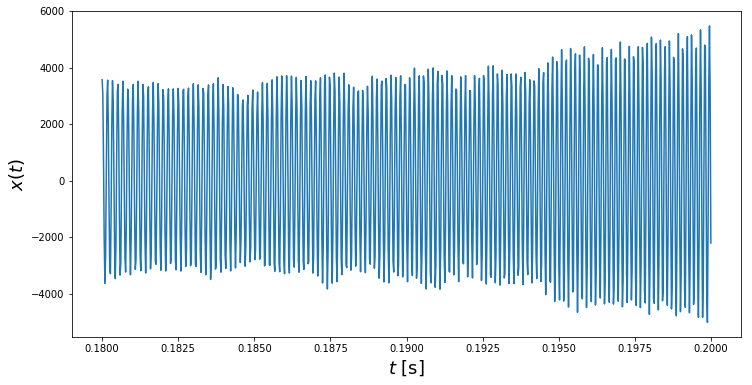

In [7]:
t0 = 0.18   # instant de début du segment considéré
T = 0.02    # durée du signal

t = linspace(t0,t0+T,int(fs*T))  # liste d'instants régulièrement espacés dans T seconde.

figure(figsize=(12,6))

plot(t,x[int(fs*t0):int(fs*(t0+T))])

xlabel(r'$t$ [s]',fontsize=18)
ylabel(r'$x(t)$',fontsize=18)
show()

#### Now consider a limited portion fo the signal, considering only `n` samples:

In [8]:
n = 2**15  # 32768 samples
y = x[:n,]

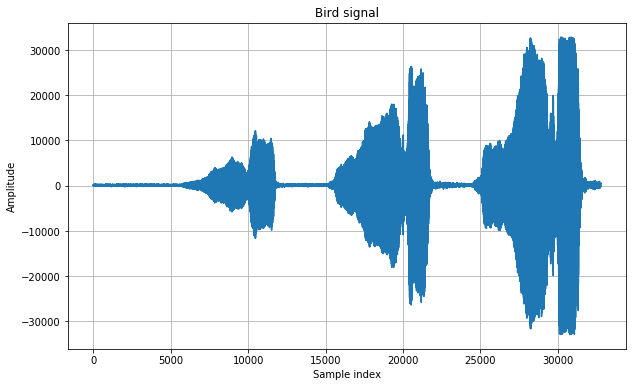

In [9]:
plt.figure(figsize=(10,6))
plot(y)
grid()
xlabel('Sample index')
ylabel('Amplitude')
title('Bird signal')
show()

## Fourier transform of the signal

One can first compute the discrete Fourier transform of the signal and display its modulus to have an idea about the distribution of its energy in the frequency space (remember that $S_x(\nu) = |X(\nu)|^2$ for continous-time signal of finite energy, with $S_x$ the energy spectral density of $x$). 

The frequencies at which the discrete Fourier transform is computed go from $0$ to $(n-1)\frac{fs}{n}$ (with $n$ the number of signal samples), with a regular frequency step $\frac{fs}{n}$:

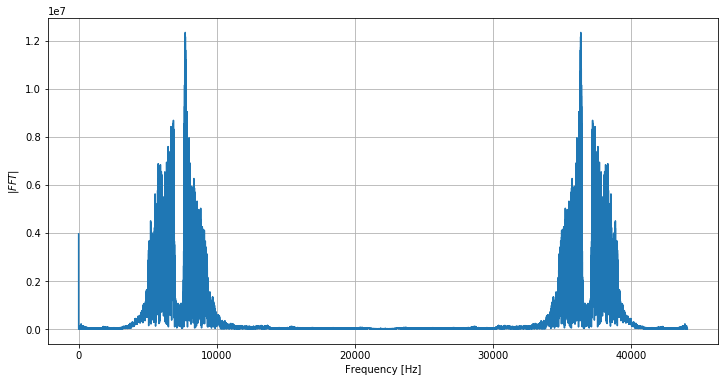

In [10]:
n = 2**15  
xn = x[0:n]

Xf = fft(xn)

freq = arange(0,n*fs/n,fs/n) # list of frequencies associated with the DFT

figure(figsize=(12,6))
plot(freq, abs(Xf))
xlabel('Frequency [Hz]')
ylabel(r'$| FFT |$')
grid()
show()

For a better readability and to highlight the Hermitian symmetry of the Fourier transform of real signals, the `fftshift` function centers frequencies around $0$, between $ -\frac{fs}{2} $ and $ (n-1)\frac{fs}{2n}$.

One can use the `fftfreq`function to automatically access the associated list of frequencies.

_Remark: note that the `fftfreq` function produces frequencies from 0 to fs/2 followed by frequencies from -fs/2 to -fs/2n._

In [11]:
freq=fftfreq(n, d=1./fs)
print(freq[0:3])
print(freq[16384-2:16384+2])
print(freq[-3:])

[0.         1.3458252  2.69165039]
[ 22047.30834961  22048.6541748  -22050.         -22048.6541748 ]
[-4.03747559 -2.69165039 -1.3458252 ]


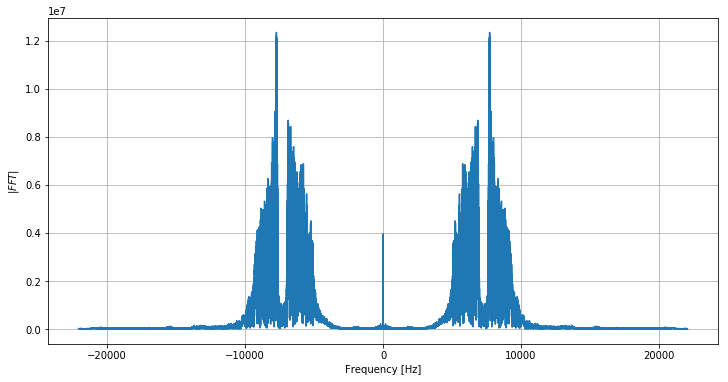

In [12]:
x_f = fftshift(fft(xn))

#freq= arange(-fs/2,fs/2, fs/n) # symmetrical vector of frequencies
freq = fftshift(fftfreq(n, d=1./fs))   # scipy function

figure(figsize=(12,6))
plot(freq,abs(x_f))
xlabel('Frequency [Hz]')
ylabel(r'$| FFT |$')
grid()
show()

### Exercise 1 <a id="ex1"></a> [[back to top]](#content)
1. What is the value of the sampling frequency `fs` used above? What does it correspond to?
2. What are the characteristic frequencies of the bird song studied here?

In [13]:
print (fs)

44100


1. The value of the sampling frequency is 44100 Hz. It corresponds to the step between each sample when discretizing the signal.
2. The characteristic frequencies are between 5000 Hz and 7000 Hz, and between 7500 Hz and 10000 Hz.

The Fourier transform only gives access to a global information on the frequency content of the signal. A "local" Fourier analysis would be useful to have a more precise description of the sound, such as local amplitude and local frequency variations (local in the temporal domain). 

#### Local oscillations of a signal

A sound is usually a locally oscillating, quasi-stationary signal. We illustrate this property by looking more closely at different segments of the signal (in the time domain).

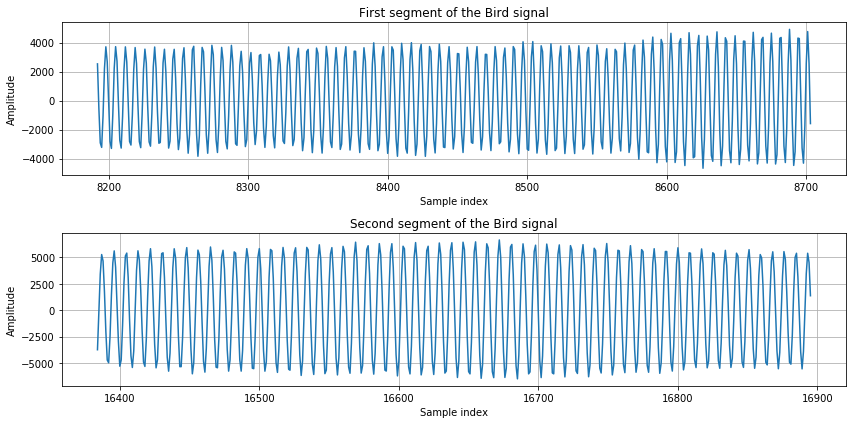

In [14]:
# t = arange(n)/fs # list of times considered
t = np.arange(0,n,1)
p = 512       # number of samples of a piece of signal


figure(figsize=(12,6))
##
sel = int(n/4) + np.arange(0,p)  # list of times considered
subplot(211)  # first piece
plot(t[sel],y[sel])
xlabel('Sample index')
ylabel('Amplitude')
title('First segment of the Bird signal')
grid()

##
sel = int(n/2) + np.arange(0,p)  # list of a subset of instants
subplot(212)  # second piece
plot(t[sel],y[sel])
xlabel('Sample index')
ylabel('Amplitude')
title('Second segment of the Bird signal')
grid()
tight_layout()
show()

---
## Section 2 : Fourier analysis of segments <a id="section2"></a> [[back to top]](#content)

**Objective:** this section will guide you to compute the Fourier transform of various segments of the signal (centered around time instants `tk`), and represent its modulus to illustrate the variations of the local frequency content of the signal across time. Detailed steps are reported at the end of this section.

To this aim, we will consider the Fourier transform (use the `fft` & `fftshift` functions) of segments of the signal `w*x`, where `w` is a window function centered in `tk`. One can use for instance a Gaussian window containing $2N+1$ samples, with $N=400$ and a standard deviation $\sigma = 200$.
    
**Indication :** to build a Gaussian window, **use the function `get_window`**. Useful code examples are given below, along 

**Note:** you should always have $n_0> N$, where $n_0$ denotes the index of a time instant of interest.

In [15]:
t=np.arange(0,x.size)/fs # list of times considered

n0=10000   # corresponds to instant (n0-1)/fs in time

#t0 = (n0-1)/fs  # instant of interest

N=400      # half width of the analysing window

L = 2*N+1 ;   # number of samples considered per segment 

sel = arange(n0-N,n0+N+1,1)  # sample indices of the selected segment

sigma=200    # standard deviation of the Gaussian window

gauss_win = get_window(('gaussian', sigma), L) # 1/sqrt(2*pi*sigma**2)*exp(-(sel-n0)**2/2/sigma**2);


Displaying the window as a function of the sample index

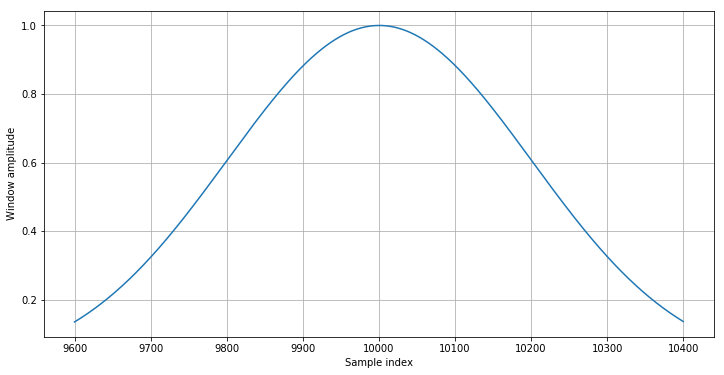

In [16]:
figure(figsize=(12,6))
plot(sel,gauss_win)
xlabel('Sample index')
ylabel('Window amplitude')
grid()
show()

Displaying the window as a function of time:

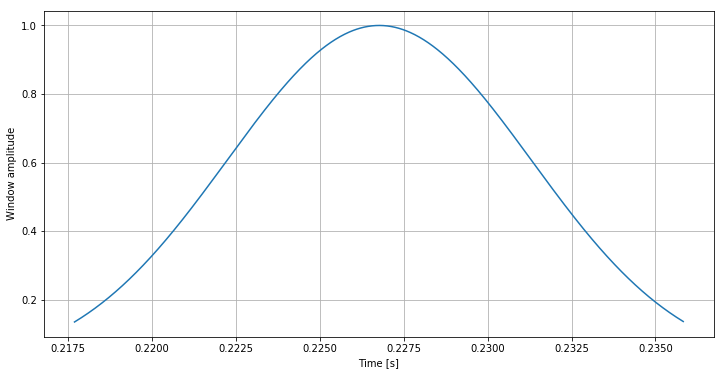

In [17]:
figure(figsize=(12,6))
plot(t[sel],gauss_win)
xlabel('Time [s]')
ylabel('Window amplitude')
grid()
show()

We extract the signal segment taken for local Fourier analysis, and multiply it by the Gaussian window centered at $n_0$ (corresponding to time $t_0 = (n_0-1)/fs$:

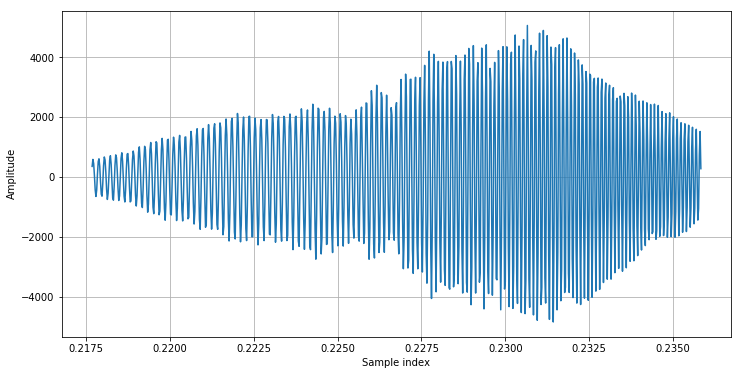

In [18]:
x_segment = gauss_win*xn[sel]

figure(figsize=(12,6))
plot(t[sel],x_segment)
xlabel('Sample index')
ylabel('Amplitude')
grid()
show()

We compute and display the amplitude spectrum of the segment:

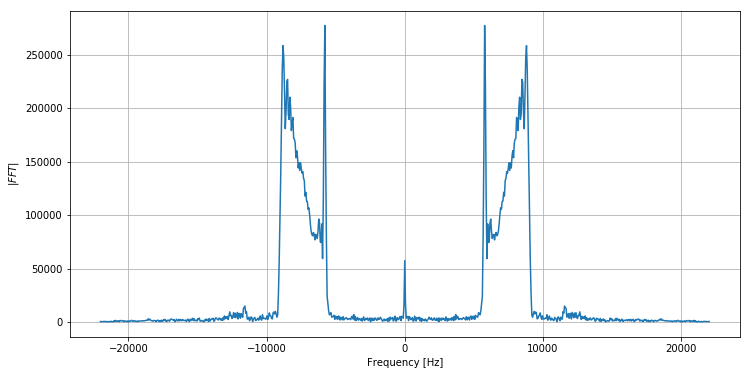

In [19]:
Xf = fftshift(fft(x_segment)) 
# freq = arange(-fs/2,fs/2,fs/L)  # or see line below: 
freq = fftshift(fftfreq(Xf.size, d=1./fs))    # scipy function

figure(figsize=(12,6))
plot(freq,abs(Xf))
xlabel('Frequency [Hz]')
ylabel(r'$| FFT |$')
grid()
show()

### Exercice 2 <a id="ex2"></a> [[back to top]](#content)

1. Compute the Fourier transform of a segment of the signal around different values of `t0`, for example from `t0` = 1000 to `t0` = 10000 in steps of 1000. For this, we consider the Fourier transform (use `fft` and` fftshift`) of the `x*w` signal where` w` is a regular window function centered on `t0`. For example, use a Gaussian window of width $ 2N + 1 $ samples with $ N = 400 $ and $ \ sigma = 200 $.
2. Observe the results obtained and comment.
3. What does the segmented analysis highlight?

1. Display the Gaussian window for different values of $\sigma$ ($=50, 100$ et $200$ for instance) as well as its product with the local segment of signal `x[sel]` around some instant.

2. For each value of $\sigma$ (width of the Gaussian window), compute the Fourier  transform of the window. Observe & comment.

3. Compute the Fourier transform of a segment of signal around sample $n_0 = 10000$. Observe and comment.

4. Why do we mumtiply the segment of signal with a Gaussian (or other) window before computing its Fourier transform ? _You may compare sprectram obtained with/without a Gaussian window, in particular by zooming in the spectral lines to check its detailed shape._

4. For $\sigma=200$, write a loop `for` to repeat the previous analysis on a set of segments at various instants $t_k$ (associated to samples $n_k$), for instance from  $n_k=10000$ to $n_k=20000$ with a step of $1000$. 

5. Represent the sum of all these spectra altogether on one graph. What do you notice in comparison with the global spectrum of the signal $x$? _Indication: you may even extend the result of previous question to a larger set of instants for better evidence; see code below._


**Remark :** one must always ensure that $n_0>N$, where $n_0$ denotes the index of a time instant of interest.

In [20]:
t=np.arange(0,x.size)/fs # list of times considered

n0=1000   # corresponds to instant (n0-1)/fs in time

#t0 = (n0-1)/fs  # instant of interest

N=400      # half width of the analysing window

L = 2*N+1 ;   # number of samples considered per segment 

sel = arange(n0-N,n0+N+1,1)  # sample indices of the selected segment

sigma=200    # standard deviation of the Gaussian window

gauss_win = get_window(('gaussian', sigma), L) # 1/sqrt(2*pi*sigma**2)*exp(-(sel-n0)**2/2/sigma**2);

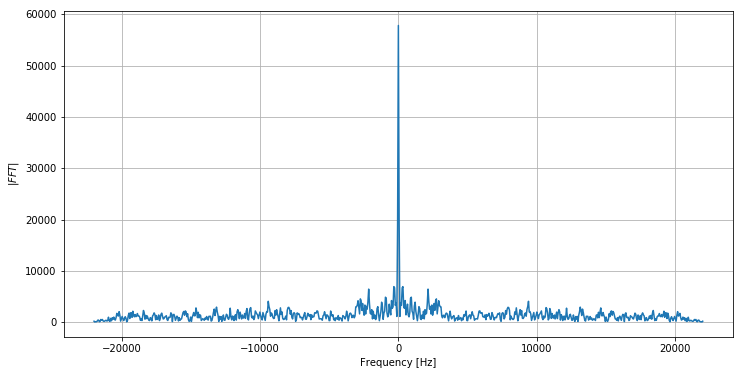

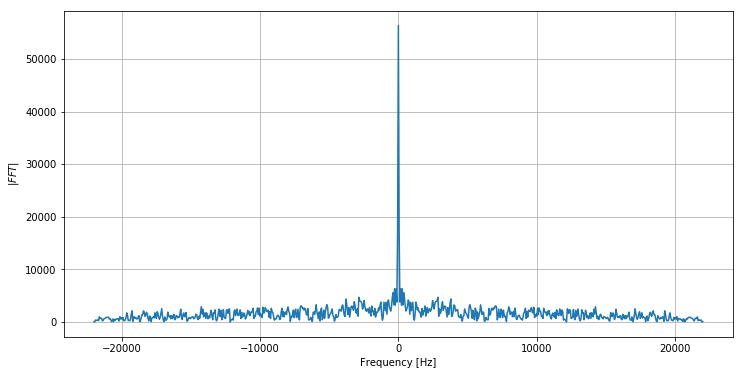

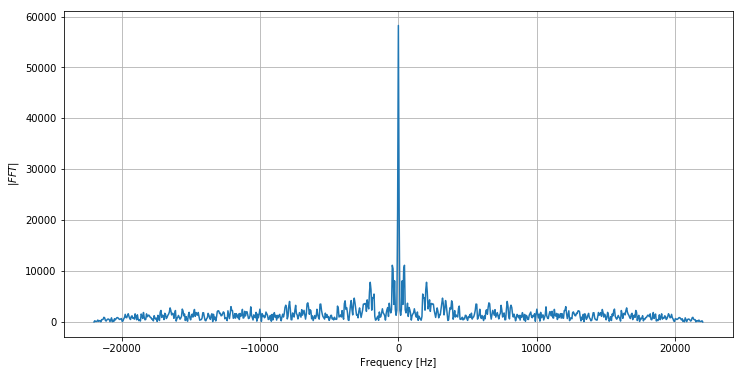

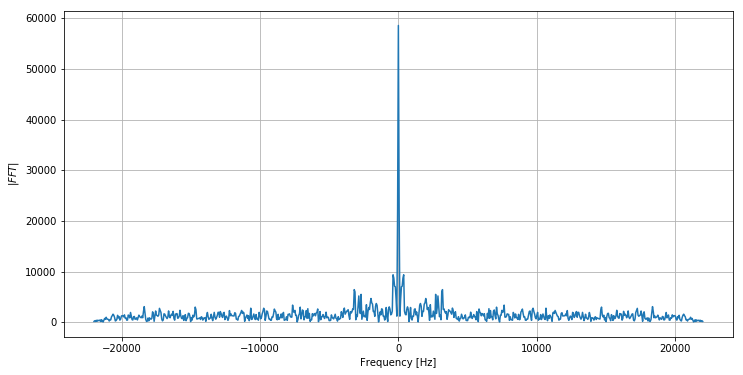

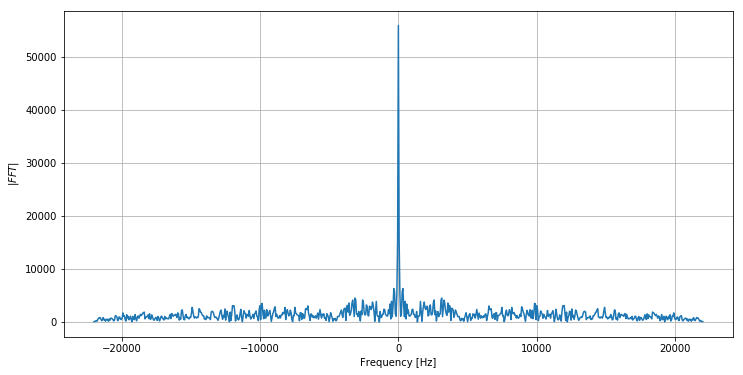

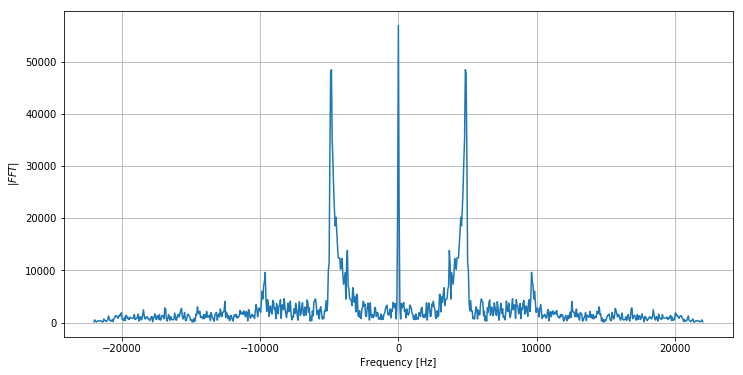

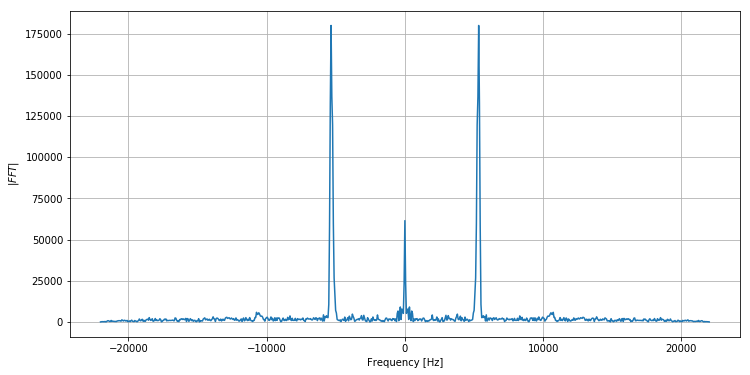

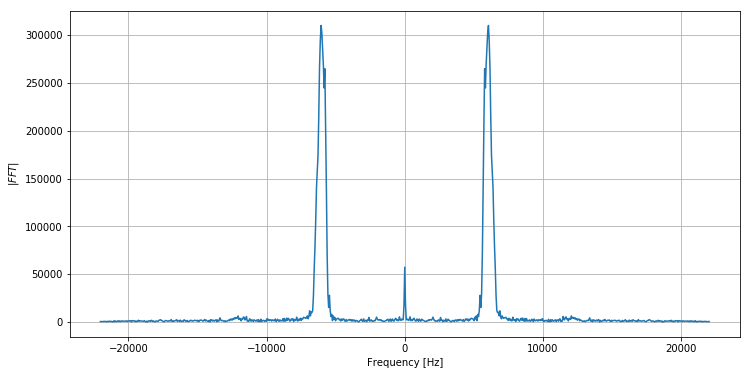

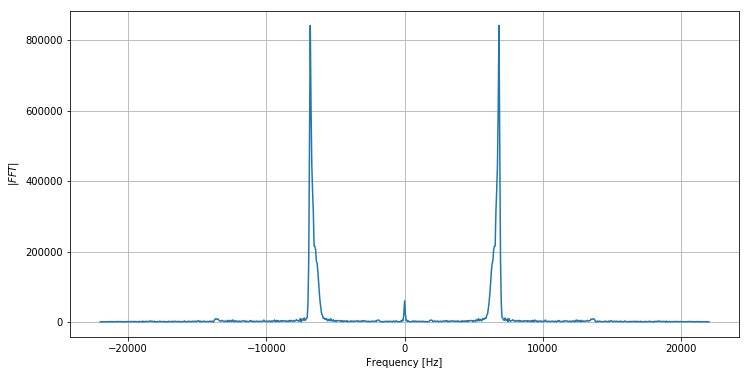

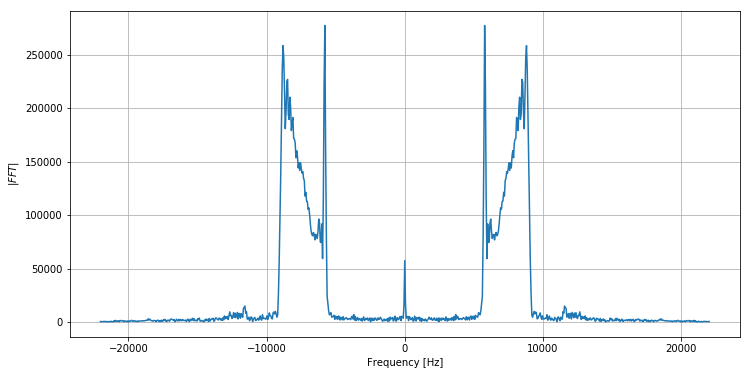

In [21]:
for i in range (10):
    n0=1000+i*1000
    sel = arange(n0-N,n0+N+1,1)
    x_segment = gauss_win*xn[sel]
    Xf = fftshift(fft(x_segment)) 
# freq = arange(-fs/2,fs/2,fs/L)  # or see line below: 
    freq = fftshift(fftfreq(Xf.size, d=1./fs))    # scipy function

    figure(figsize=(12,6))
    plot(freq,abs(Xf))
    xlabel('Frequency [Hz]')
    ylabel(r'$| FFT |$')
    grid()
    show()


2. For N0 ranging between 1000 and 5000 samples, we observe 1 unique peak on 0 Hz. Then, 2 additional peaks appear at -5000 Hz and 5000 Hz. Their width increases with N0 and they seem to open outwards.
3. It allows to analyze the frequencies that intervene only within a specific segment. We can thus know when specific frequencies appear.

In [22]:
t=np.arange(0,x.size)/fs # list of times considered

n0=10000   # corresponds to instant (n0-1)/fs in time

#t0 = (n0-1)/fs  # instant of interest

N=400      # half width of the analysing window

L = 2*N+1 ;   # number of samples considered per segment 

sel = arange(n0-N,n0+N+1,1)  # sample indices of the selected segment

sigma=200    # standard deviation of the Gaussian window

gauss_win = get_window(('gaussian', sigma), L) # 1/sqrt(2*pi*sigma**2)*exp(-(sel-n0)**2/2/sigma**2);


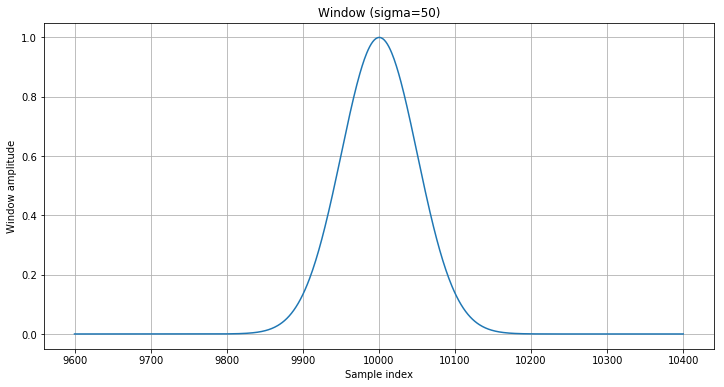

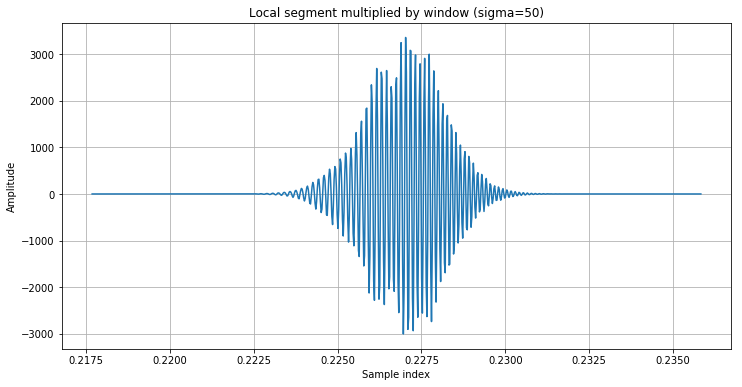

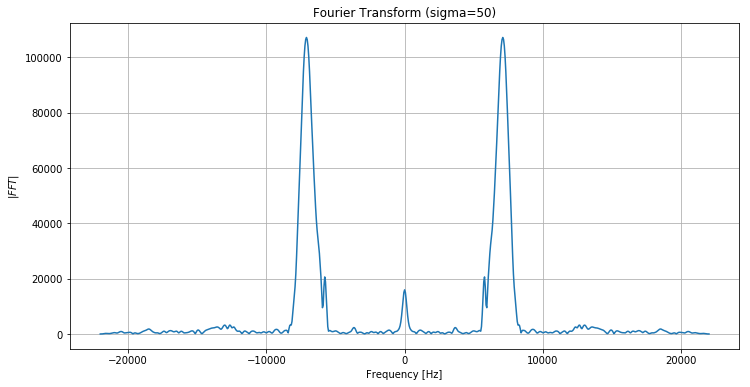

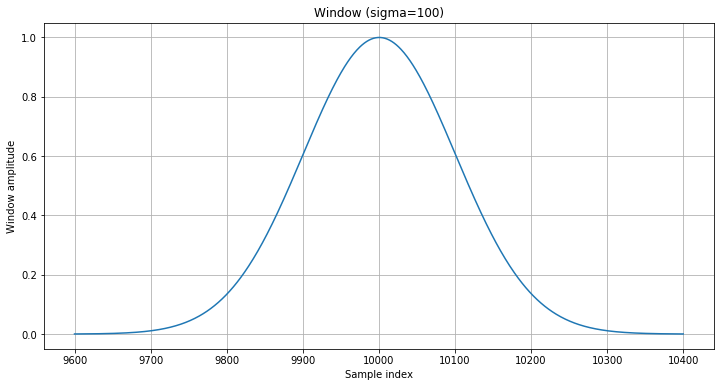

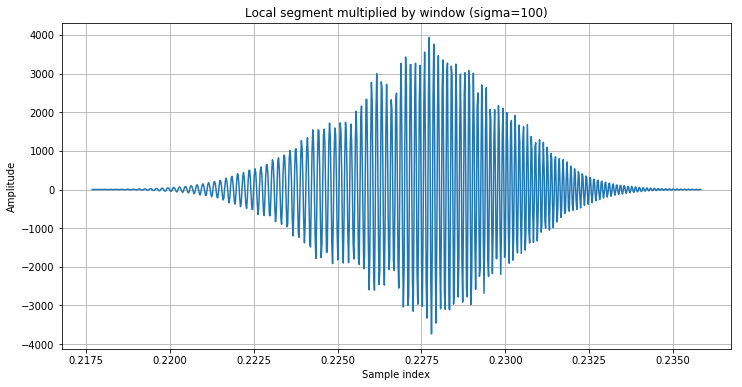

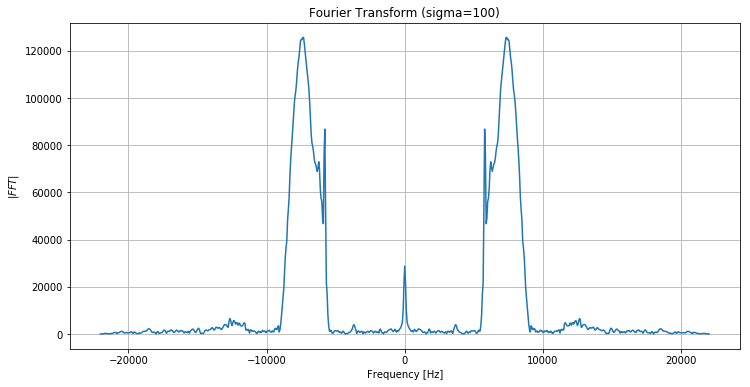

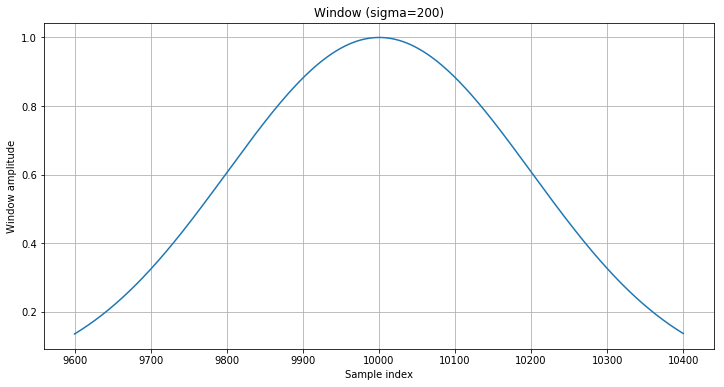

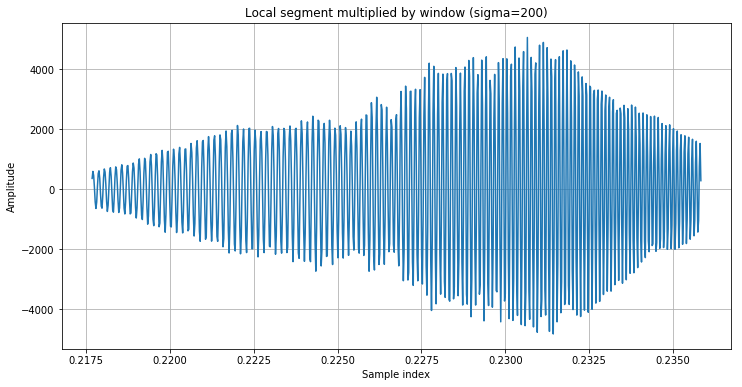

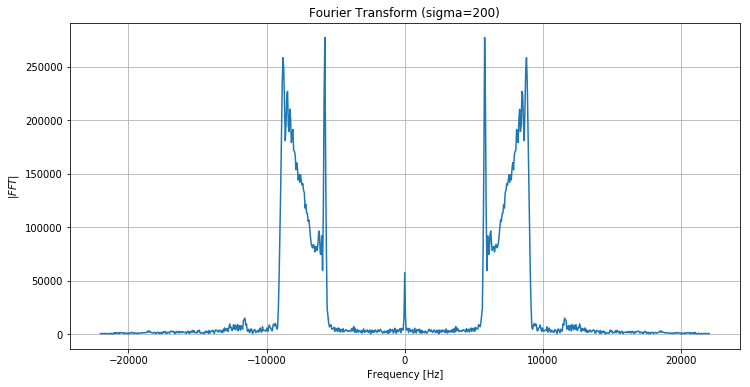

In [23]:
for sigma in [50,100,200]:
    gauss_win = get_window(('gaussian', sigma), L)
    figure(figsize=(12,6))
    plot(sel,gauss_win)
    title('Window (sigma='+str(sigma)+')')
    xlabel('Sample index')
    ylabel('Window amplitude')
    grid()
    show()
    x_segment = gauss_win*xn[sel]
    figure(figsize=(12,6))
    plot(t[sel],x_segment)
    xlabel('Sample index')
    ylabel('Amplitude')
    title('Local segment multiplied by window (sigma='+str(sigma)+')')
    grid()
    show()
    Xf = fftshift(fft(x_segment)) 
    # freq = arange(-fs/2,fs/2,fs/L)  # or see line below: 
    freq = fftshift(fftfreq(Xf.size, d=1./fs))    # scipy function
    figure(figsize=(12,6))
    plot(freq,abs(Xf))
    xlabel('Frequency [Hz]')
    ylabel(r'$| FFT |$')
    title('Fourier Transform (sigma='+str(sigma)+')')
    grid()
    show()

4. 
5. With a smaller sigma, only frequencies in the center of the window are kept, which smooths out the signal in the Fourier Transform. As sigma increases, more information is kept which leads to a noisier signal. 

6. The peaks grow wider, as if each peak was spliting into 2 peaks.

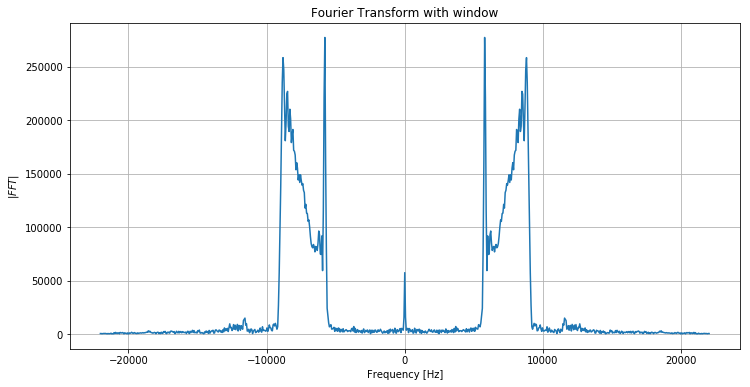

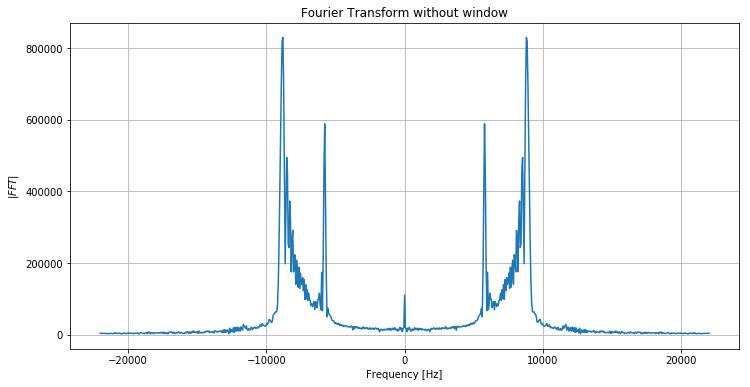

In [24]:
t=np.arange(0,x.size)/fs # list of times considered

n0=10000   # corresponds to instant (n0-1)/fs in time

#t0 = (n0-1)/fs  # instant of interest

N=400      # half width of the analysing window

L = 2*N+1 ;   # number of samples considered per segment 

sel = arange(n0-N,n0+N+1,1)  # sample indices of the selected segment

sigma=200    # standard deviation of the Gaussian window

gauss_win = get_window(('gaussian', sigma), L) # 1/sqrt(2*pi*sigma**2)*exp(-(sel-n0)**2/2/sigma**2);

x_segment = gauss_win*xn[sel]

Xf = fftshift(fft(x_segment)) 
# freq = arange(-fs/2,fs/2,fs/L)  # or see line below: 
freq = fftshift(fftfreq(Xf.size, d=1./fs))    # scipy function

figure(figsize=(12,6))
plot(freq,abs(Xf))
xlabel('Frequency [Hz]')
ylabel(r'$| FFT |$')
title('Fourier Transform with window')
grid()
show()

Xf1 = fftshift(fft(xn[sel])) 
# freq = arange(-fs/2,fs/2,fs/L)  # or see line below: 
freq = fftshift(fftfreq(Xf1.size, d=1./fs))    # scipy function

figure(figsize=(12,6))
plot(freq,abs(Xf1))
xlabel('Frequency [Hz]')
ylabel(r'$| FFT |$')
title('Fourier Transform without window')
grid()
show()

7. When we multiply the signal by the window, the amplitude of the Fourier Transform is divided by 2 or 3, depending on the frequency. It allows to keep information around the chosen sample (N0). As the signal goes further from the sample, it is attenuated.

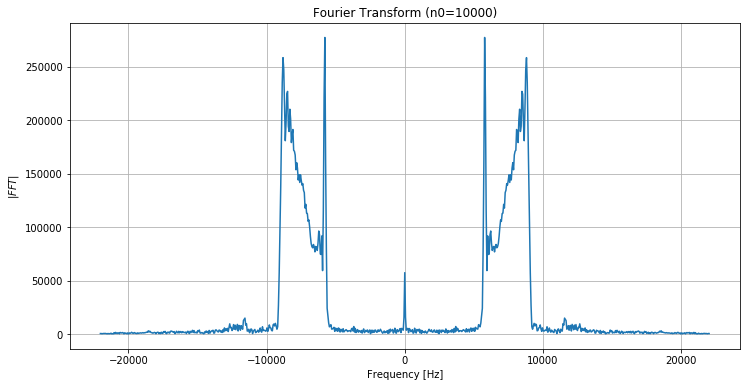

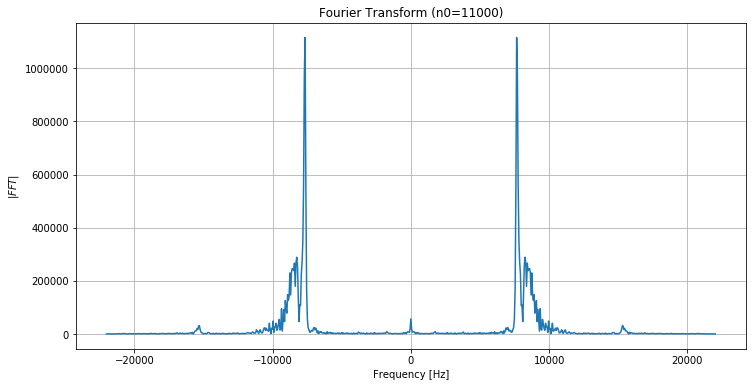

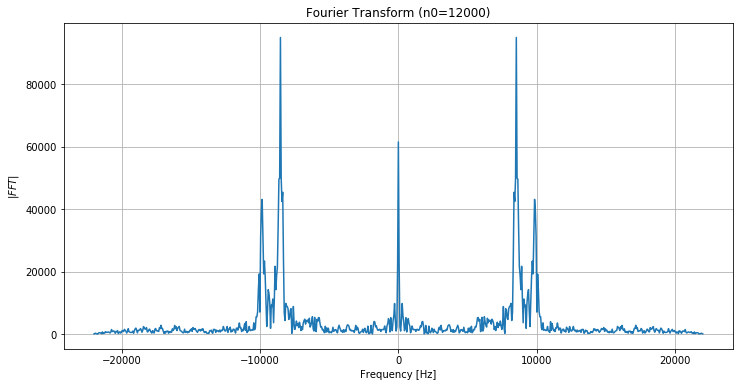

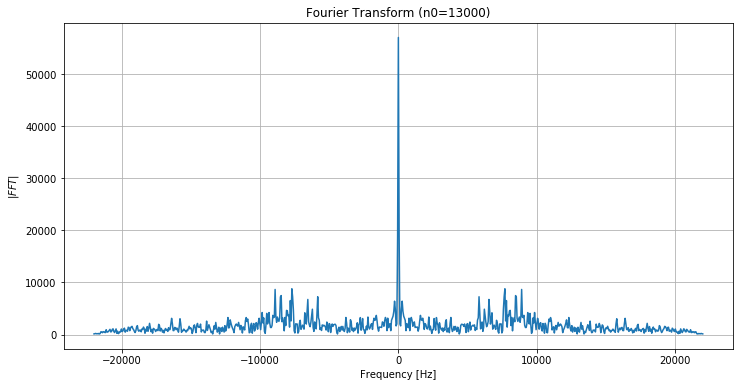

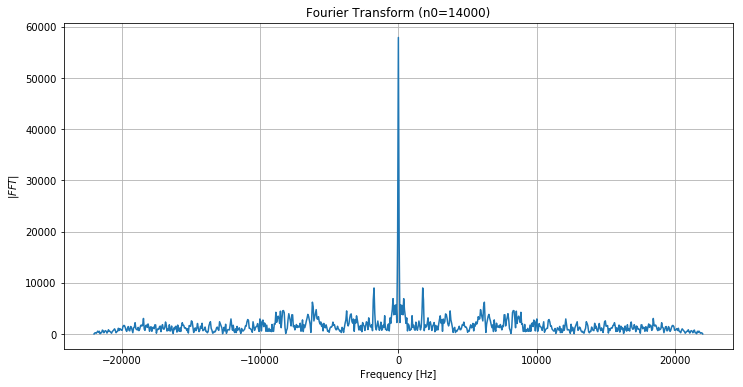

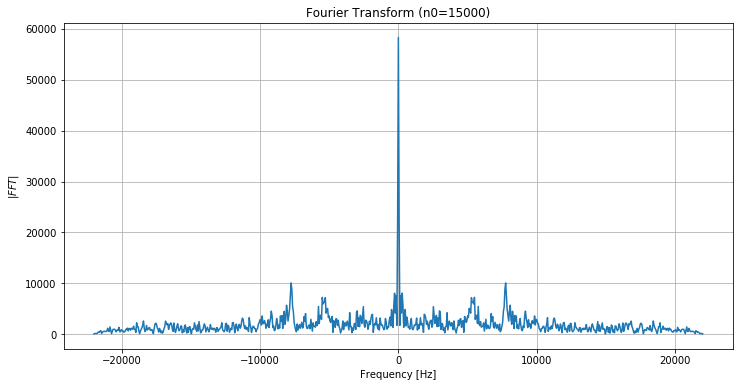

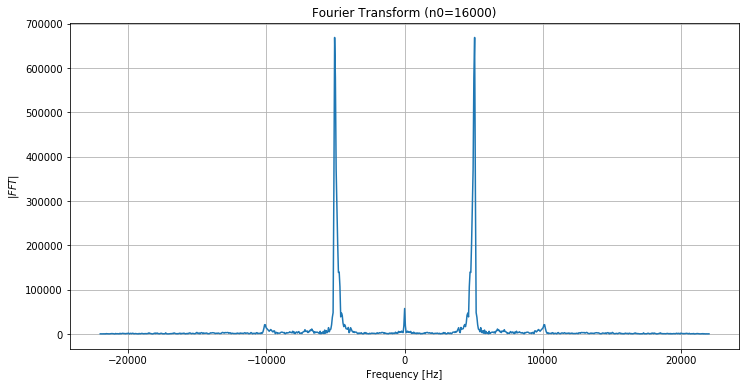

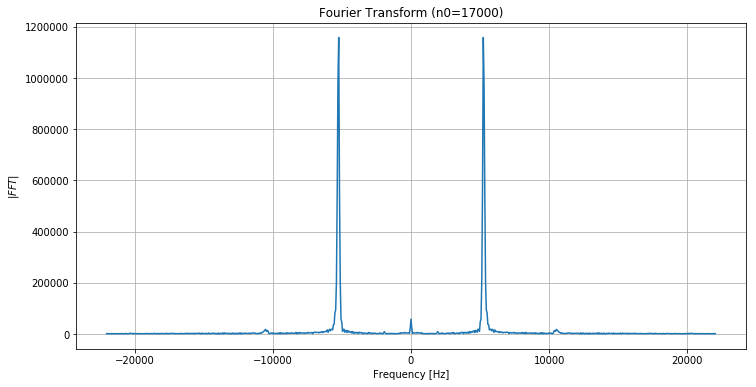

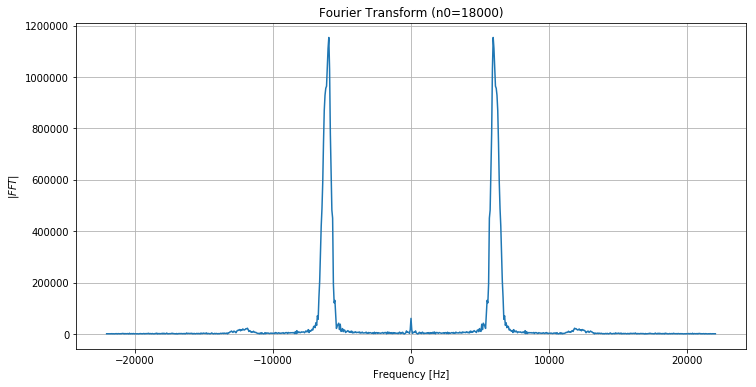

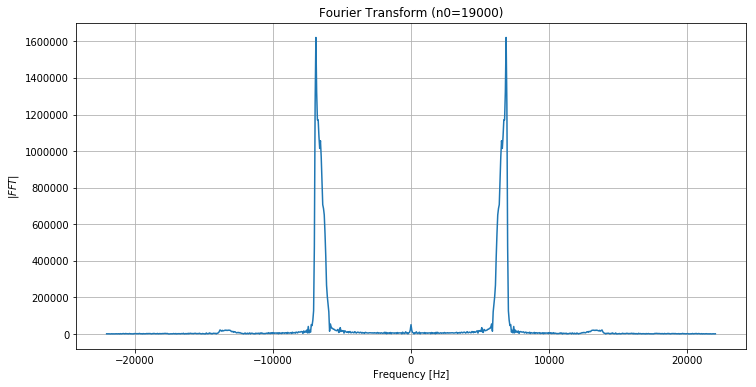

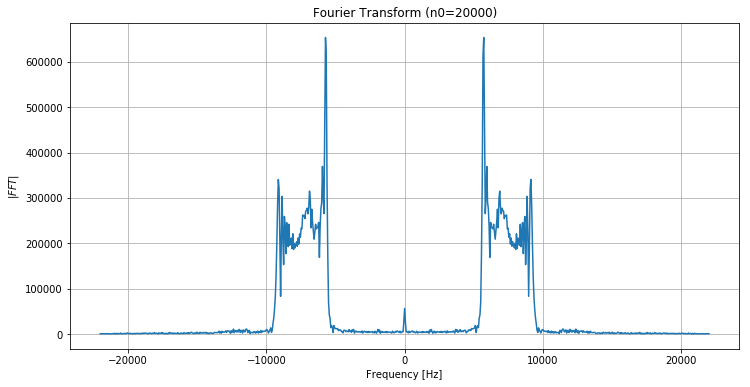

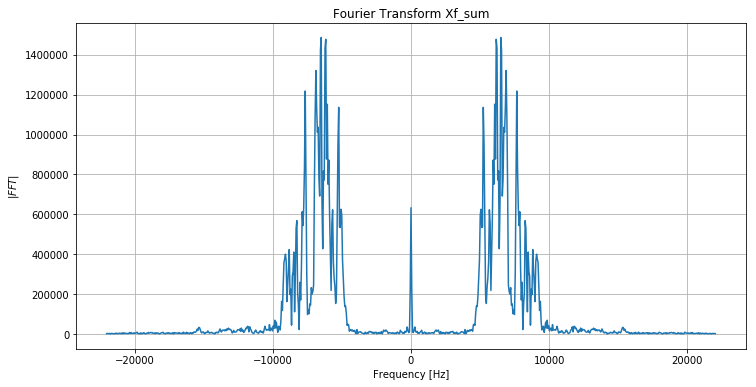

In [25]:
t=np.arange(0,x.size)/fs # list of times considered

#t0 = (n0-1)/fs  # instant of interest

N=400      # half width of the analysing window

L = 2*N+1 ;   # number of samples considered per segment 

sel = arange(n0-N,n0+N+1,1)  # sample indices of the selected segment

sigma=200    # standard deviation of the Gaussian window

gauss_win = get_window(('gaussian', sigma), L) # 1/sqrt(2*pi*sigma**2)*exp(-(sel-n0)**2/2/sigma**2);

Xf_sum = [0]*len(sel)

for i in range (11):
    n0=10000+i*1000
    sel = arange(n0-N,n0+N+1,1)
    x_segment = gauss_win*xn[sel]
    Xf = fftshift(fft(x_segment))
    Xf_sum=Xf_sum + Xf
# freq = arange(-fs/2,fs/2,fs/L)  # or see line below: 
    freq = fftshift(fftfreq(Xf.size, d=1./fs))    # scipy function

    figure(figsize=(12,6))
    plot(freq,abs(Xf))
    xlabel('Frequency [Hz]')
    ylabel(r'$| FFT |$')
    title ('Fourier Transform (n0='+str(n0)+')')
    grid()
    show()
    
figure(figsize=(12,6))
plot(freq,abs(Xf_sum))
xlabel('Frequency [Hz]')
ylabel(r'$| FFT |$')
title ('Fourier Transform Xf_sum')
grid()
show()

9. We notice that the global shape of the Fourier transform of the sum of the signals starts to ressemble the Fourier transform of the original signal. If we added the information of several segments, we would probably get even closer to the original signal.

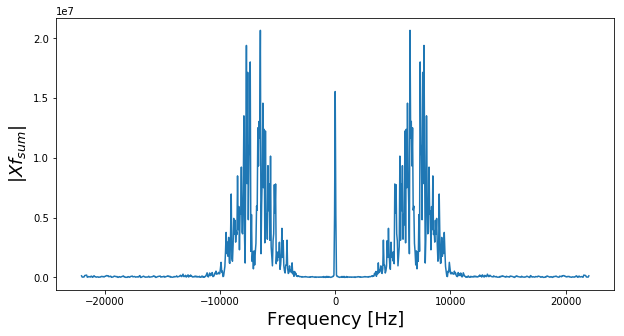

In [26]:
# Indication to sum several spectra from successive segments
# freq = arange(-Fe/2,Fe/2,Fe/L), equivalent to :
freq = fftshift(fftfreq(Xf.size, d=1./fs))

# initialization of Xf_sum
n0 = N
sel = arange(n0-N,n0+N+1,1)       # indices of the samples composing the selected segment
x_segment = gauss_win*x[sel]
Xf_sum = fftshift(fft(x_segment)) 

for n0 in arange(N,len(x)-L,N):   # loop over successive segments, spaced by L samples
    sel = arange(n0-N,n0+N+1,1)   # indices of the samples composing the selected segment
    x_segment = gauss_win*x[sel]
    Xf_sum += fftshift(fft(x_segment)) 

figure(figsize=(10,5))
plot(freq,abs(Xf_sum))
xlabel('Frequency [Hz]',fontsize=18)
ylabel(r'$|Xf_{sum}|$',fontsize=18)
show()    

### A dynamic plot of the Short-Time Fourier Transform

In [27]:
# !!!! DO NOT MODIFY THIS CELL !!!! 
from bokeh.layouts import row, column

#t=np.arange(0,xn.size)/fs # list of times considered

def fft_segment(k=1):
    
    fs = 44100
    n0=k*500
    N=200
    L = 2*N+1 ;                  # number of samples considered per segment
    sel = arange(n0-N,n0+N+1,1)  # sample indices of the selected segment
    sigma=100
    gauss_win = get_window(('gaussian', sigma), L) # 1/sqrt(2*pi*sigma**2)*exp(-(sel-n0)**2/2/sigma**2);
    
    x_segment = gauss_win*xn[sel]
    Xf = fftshift(fft(x_segment)) 
    
    xs = [[(n0-N)/fs, (n0-N)/fs], [(n0+N)/fs, (n0+N)/fs]]
    M = max(abs(xn))
    ys =[[-M, M]]*2
    
    window_line.data_source.data = dict(xs=xs, ys=ys)
    rx.data_source.data = dict(x=t[sel],y=x_segment)
    rX.data_source.data['y'] = abs(Xf)
    push_notebook()
    

fig_xn = bkfigure(title = 'x', plot_height=200, plot_width=600)
fig_x = bkfigure(title = 'x_segment', plot_height=200, plot_width=300)
fig_X = bkfigure(title = '| FFT [x_segment] |', plot_height=200, plot_width=300)

fs = 44100
n0 = 500
N=200
L = 2*N+1 ;   
sel = arange(n0-N,n0+N+1,1)  
sigma=100
gauss_win = get_window(('gaussian', sigma), L) # 1/sqrt(2*pi*sigma**2)*exp(-(sel-n0)**2/2/sigma**2);
x_segment = gauss_win*xn[sel]
Xf = fftshift(fft(x_segment)) 
freq = fftshift(fftfreq(Xf.size, d=1./fs))   
# freq = arange(-Fe/2,Fe/2,Fe/L)

# !!!! DO NOT MODIFY THIS CELL !!!! 

In [28]:
# EXECUTE THE PREVIOUS CELL THEN THE CELL TO START THE INTERACTIVE VISUALIZATION
# plot of the original signal xn
t=np.arange(0,xn.size)/fs # list of times considered

M = max(abs(xn))
rxn = fig_xn.line(t,xn) #,color = "red")
window_line = fig_xn.multi_line(xs = [[(n0-N)/fs, (n0-N)/fs], [(n0+N)/fs, (n0+N)/fs]],ys =[[-M, M]]*2,color="firebrick",line_width=2)
# plots of the segement and its Fourier transform
rx = fig_x.line(t[sel], x_segment) #,color = "red")
rX = fig_X.line(freq, abs(Xf)) #,color = "red")

bkshow(column(children=[fig_xn, row(fig_x, fig_X)]), notebook_handle=True)
interact(fft_segment, k=(1,65));

interactive(children=(IntSlider(value=1, description='k', max=65, min=1), Output()), _dom_classes=('widget-int…

### Exercise 3 <a id="ex3"></a> [[back to top]](#content)
1. Move the cursor above to explore the signal in time and frequency

2. Comment on your observations.

2. When the amplitude of the signal is important (eg when the bird sings), it is constrained by the window, and we see the corresponding peaks in the Fourier Transform. These peaks characterize the frequencies of the signal at a certain time. . 

---
## Section 3: Introduction to time-frequency analysis <a id="section3"></a> [[back to top]](#content)

### Short-Time Fourier Transform: spectrogram & reconstruction

In order to follow the evolution of the frequency content of a signal over time, one can use the _Short-Time Fourier Transform (STFT)_. This representation has 2 indices, one for the time instant where
the window is centered, and another for the frequencies.
In practice, computing the STFT first consists in dividing a the time signal into shorter segments, of equal length. A Fourier transform is then computed separately for each of the extracted segments. This reveals the Fourier spectrum of each shorter segment. 

The interest of this representation is to gather local Fourier transforms (vertical frequency axis) calculated on regularly spaced time windows (horizontal time axis) so as to deduce the **spectrogram**, a 2D visual heat map. The square of the amplitude of the STFT is interpreted as a time-frequency energy density.

In general, windows overlap in time, which leads to a certain redundancy enhancing the readability of the time-frequency information. This redundant representation can be reversed (_pseudo-inverse_) to reconstruct the original signal. One can show that the energy is preserved from the time to the frequency domain.

The parameters to compute a spectrogram parameters are:

* the shape of the analysis window
* the window size
* the time spacing between 2 successive windows, denoted `spacing` here, which also conditions the amount of overlap between consecutive windows.

The `stft` function is used to calculate the Short-Time Fourier Transform of a given signal, while the `spectrogram` function provides a graphical representation. The vertical axis corresponds to the frequencies (positive only) sampled between $ 0 $ and $ \frac{F_e}{2} $, and the horizontal axis to temporal samples. 

An example of application is given below:

In [29]:
n = 14000; # length of the extracted vector
fs, x = read('sounds/bird.wav')
y = x[0:n]

sd.play(y,fs)
print(1/fs)

2.2675736961451248e-05


Computing the STFT transform of the signal:

In [30]:
width=512;         # window width
spacing=width/8;   # number of samples between 2 successive segments
window = 'hann';   # window used

t_stft, f_stft, x_stft = stft(x, fs=1.0, window='hann', nperseg=width, noverlap=abs(spacing-width))

step=n/(fs*spacing)
print(step)
print(t_stft)
print(1/(512))

0.00496031746031746
[0.         0.00195312 0.00390625 0.00585938 0.0078125  0.00976562
 0.01171875 0.01367188 0.015625   0.01757812 0.01953125 0.02148438
 0.0234375  0.02539062 0.02734375 0.02929688 0.03125    0.03320312
 0.03515625 0.03710938 0.0390625  0.04101562 0.04296875 0.04492188
 0.046875   0.04882812 0.05078125 0.05273438 0.0546875  0.05664062
 0.05859375 0.06054688 0.0625     0.06445312 0.06640625 0.06835938
 0.0703125  0.07226562 0.07421875 0.07617188 0.078125   0.08007812
 0.08203125 0.08398438 0.0859375  0.08789062 0.08984375 0.09179688
 0.09375    0.09570312 0.09765625 0.09960938 0.1015625  0.10351562
 0.10546875 0.10742188 0.109375   0.11132812 0.11328125 0.11523438
 0.1171875  0.11914062 0.12109375 0.12304688 0.125      0.12695312
 0.12890625 0.13085938 0.1328125  0.13476562 0.13671875 0.13867188
 0.140625   0.14257812 0.14453125 0.14648438 0.1484375  0.15039062
 0.15234375 0.15429688 0.15625    0.15820312 0.16015625 0.16210938
 0.1640625  0.16601562 0.16796875 0.169921

**Indication:** A logarithmic scale is used to display the spectrogram amplitude.
In addition, the times and frequencies at which the spectrogram is observed are given by

    nf, nw = S[0].size, S[1].size
    T = n/Fe
    t_stft = arange(0,nw)*T/spacing
    f_stft = arange(0,nf/2)*Fe/width

**Graphical representation of an analysis window**

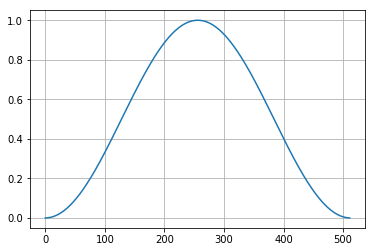

In [31]:
w = hann(M=512);
w=get_window('hann', width)
plot(w)
grid()
show()

**Graphical representation of the spectrogram**:
you can either choose the STFT modulus calculated above, or use the `spectrogram` function which calculates the square of its modulus (due to the energy conservation theorem for the STFT).

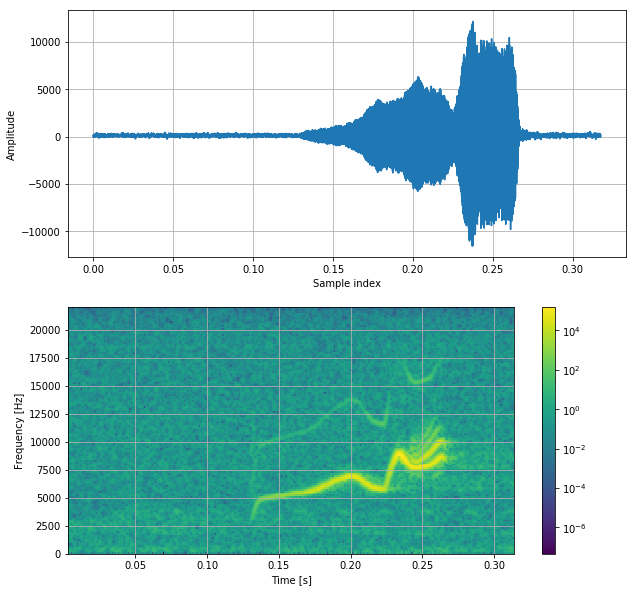

In [32]:
figure(figsize=(10,10))

# The signal in time domain
subplot(211)
plot(t[0:n],y) 
ylabel('Amplitude')
xlabel('Sample index')
grid()

# Time frequency representation
#figure(figsize=(12.7,6))
subplot(212)
width = 256  # we usually use a power of 2
spacing = width/8
f_Sy, t_Sy, Sy = spectrogram(y, fs, window='hann', nperseg=width, noverlap=width-spacing)
ax=pcolormesh(t_Sy, f_Sy, Sy, norm=LogNorm()) 
ylabel('Frequency [Hz]')
xlabel('Time [s]')
grid()
colorbar()
show()



### Exercice 4 <a id="ex4"></a> [[back to top]](#content)
1. Explain how the horizontal and vertical axes of the
spectrogram have been indexed and discretized. How should one read and interpret them? 

**Indication :** _for the frequency axis, consider the number of time samples (number of analyzed segments) represented. For the frequency axis, we have the resolution of the discrete Fourier transform of a discrete signal of length `width` (length of the analysis window), sampled at the frequency $f_s$._ 

2. Plot the spectrograms of the `glockenspiel.wav` and `deactivated.wav` sounds.
provided  in the `sounds\` folder. Observe and comment.

3. The functions `stft` and `spectrogram` call for an optional parameter 
`window='hann'`. Play with various windows and compare the resulting spectrograms.

**Online codcumentation at**
https://docs.scipy.org/doc/scipy/reference/signal.html#window-functions

1. The horizontal axis has been discretized using overlapping windows of the same length. For example, in the spectrogram shown above, windows are 256 points wide, with a spacing of 32 (so they overlap for 224 points). The maximum number of overlapping windows in the signal is calculated, which is then divided by the sampling frequency to obtain the time points. For the frequency axis, the sampling frequency is divided by the width of a window. Only one half of the "peaks" that would be seen in the Fourier Transform are represented in the spectrogram.

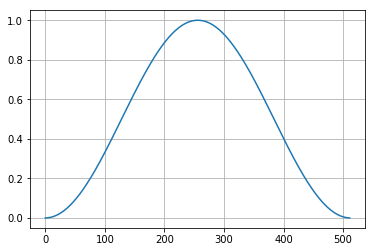

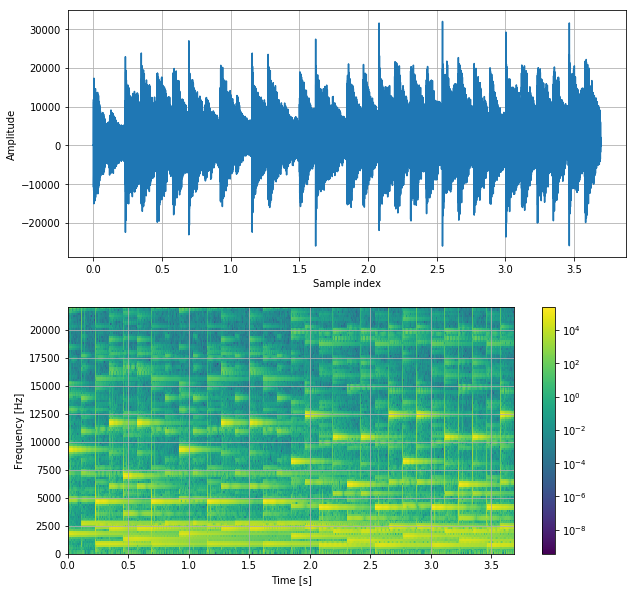

In [33]:
n = 14000; # length of the extracted vector
fs, x = read('sounds/glockenspiel_mono.wav')
# y = x[0:n]
t=np.arange(0,x.size)/fs
sd.play(x,fs)  

width=512;         # window width
spacing=width/8;   # number of samples between 2 successive segments
window = 'hann';   # window used

t_stft, f_stft, x_stft = stft(x, fs=1.0, window='hann', nperseg=width, noverlap=spacing-width)

w = hann(M=512);
w=get_window('hann', width)
plot(w)
grid()
show()

figure(figsize=(10,10))

# The signal in time domain
subplot(211)
plot(t,x) 
ylabel('Amplitude')
xlabel('Sample index')
grid()

# Time frequency representation
#figure(figsize=(12.7,6))
subplot(212)
width = 256  # we usually use a power of 2
spacing = width/8
f_Sy, t_Sy, Sy = spectrogram(x, fs, window='hann', nperseg=width, noverlap=width-spacing)
ax=pcolormesh(t_Sy, f_Sy, Sy, norm=LogNorm()) 
ylabel('Frequency [Hz]')
xlabel('Time [s]')
grid()
colorbar()
show()

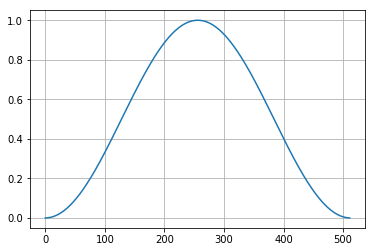

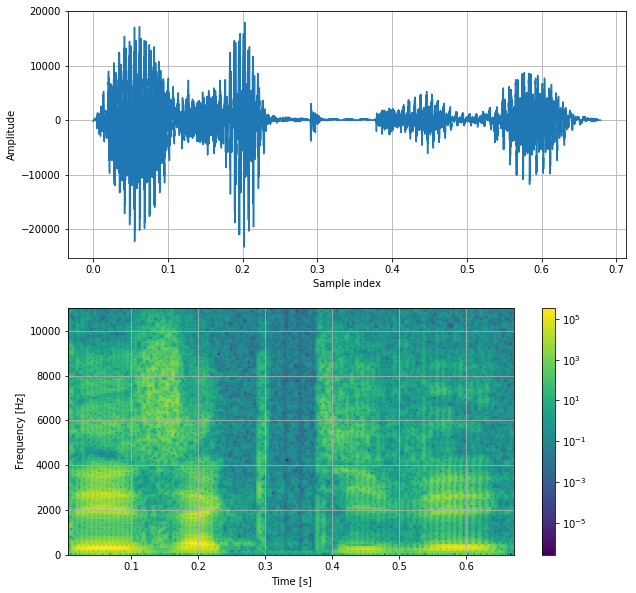

In [34]:
n = 14000; # length of the extracted vector
fs, x = read('sounds/desactive_mono.wav')
# y = x[0:n]
t=np.arange(0,x.size)/fs
sd.play(y,fs)  

width=512;         # window width
spacing=width/8;   # number of samples between 2 successive segments
window = 'hann';   # window used

t_stft, f_stft, x_stft = stft(x, fs=1.0, window='hann', nperseg=width, noverlap=spacing-width)

w = hann(M=512);
w=get_window('hann', width)
plot(w)
grid()
show()

figure(figsize=(10,10))

# The signal in time domain
subplot(211)
plot(t,x) 
ylabel('Amplitude')
xlabel('Sample index')
grid()

# Time frequency representation
#figure(figsize=(12.7,6))
subplot(212)
width = 256  # we usually use a power of 2
spacing = width/8
f_Sy, t_Sy, Sy = spectrogram(x, fs, window='hann', nperseg=width, noverlap=width-spacing)
ax=pcolormesh(t_Sy, f_Sy, Sy, norm=LogNorm()) 
ylabel('Frequency [Hz]')
xlabel('Time [s]')
grid()
colorbar()
show()

2. We notice a correlation between the amplitude of the signal and the intensity of the spectrogram, which is normal. As with the signal in time domain, we can differentiate the moments in which there is sound versus the moments where there is no signal. However, in the spectrogram, we can also see which frequencies are present at each time interval. Because of the complexity of the signals, the second spectrogram is more "readable".

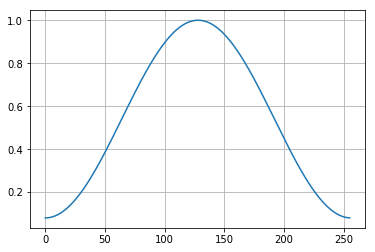

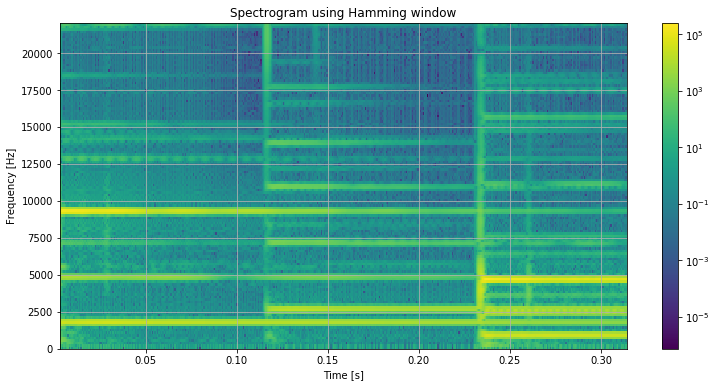

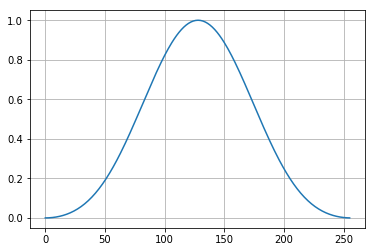

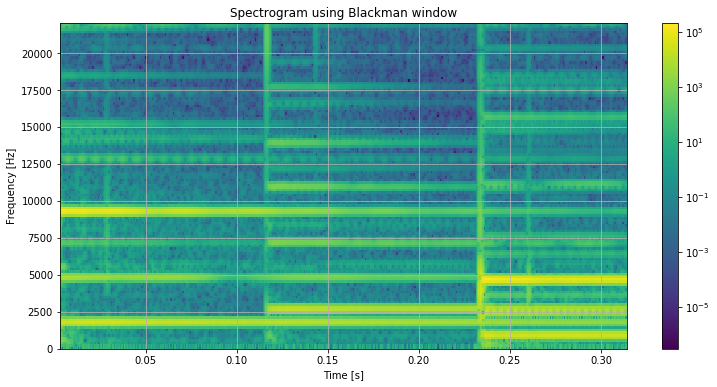

In [35]:
n = 14000; # length of the extracted vector
fs, x = read('sounds/glockenspiel_mono.wav')
y = x[0:n]
#t=np.arange(0,x.size)/fs
# sd.play(x,fs)  

# Time frequency representation

#subplot(212)
width = 256  # we usually use a power of 2
spacing = width/8
w=get_window('hamming', width)
plot(w)
grid()
show()
figure(figsize=(12.7,6))
f_Sy, t_Sy, Sy = spectrogram(y, fs, window='hamming', nperseg=width, noverlap=width-spacing)
ax=pcolormesh(t_Sy, f_Sy, Sy, norm=LogNorm()) 
ylabel('Frequency [Hz]')
xlabel('Time [s]')
title('Spectrogram using Hamming window')
grid()
colorbar()
show()

w=get_window('blackman', width)
plot(w)
grid()
show()

figure(figsize=(12.7,6))
f_Sy1, t_Sy1, Sy1 = spectrogram(y, fs, window='blackman', nperseg=width, noverlap=width-spacing)
ax=pcolormesh(t_Sy1, f_Sy1, Sy1, norm=LogNorm()) 
ylabel('Frequency [Hz]')
xlabel('Time [s]')
title('Spectrogram using Blackman window')
grid()
colorbar()
show()

3. We compared the Hamming and the Blackman windows. We notice that the Hamming window is much wider than the Blackman. This translates into a spectrogram with higher intensity (for the Hamming window), but the main frequencies for each interval are identifiable in both.

---
## Section 4: Analysis of some signals <a id="section4"></a> [[back to top]](#content)

### Exercise 5 <a id="ex5"></a> [[back to top]](#content)
Consider the signal `x` stored in the `signal_2sinus.mat` loaded below, sampled at $f_s =4096$.

1. Study this signal and his spectrogram with a window of your choice. To this aim, you may observe the spectrogram for different windows and widths, for instance `width=64`, `128, 256, 512, 1024`. Which choice of window and width allows the 2 frequencies present in this signal to be properly distinguished? (justify)

2. What is the content of this signal ? Try to be as precise as possible in your description, including characteristic frequencies. Comment and explain these results.  

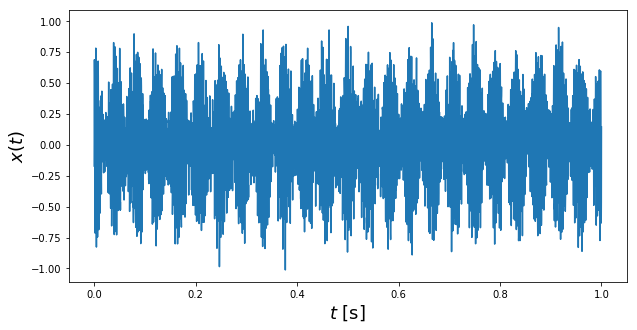

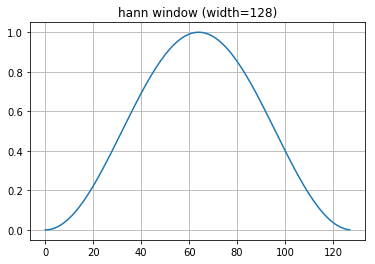

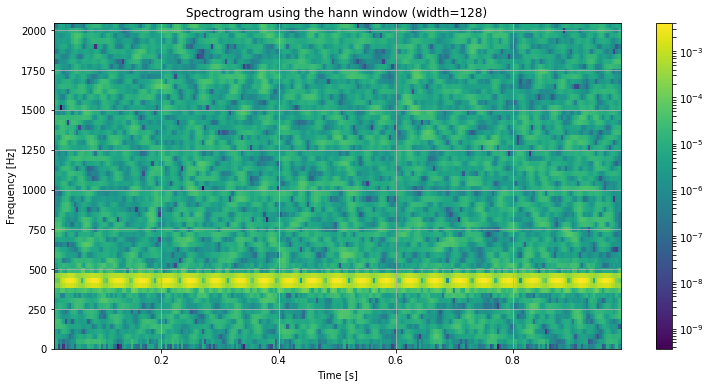

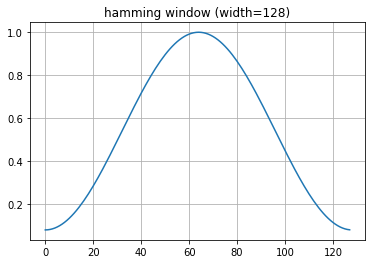

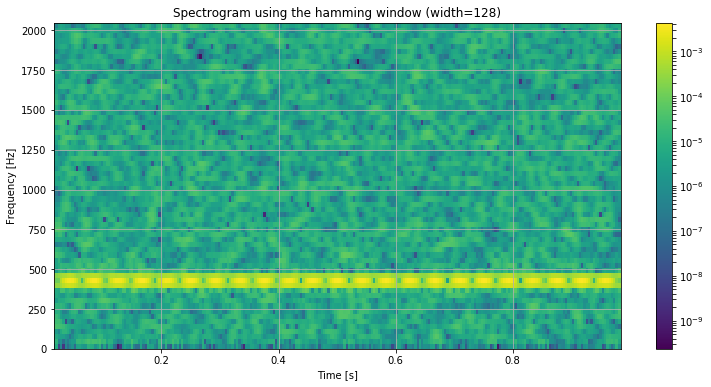

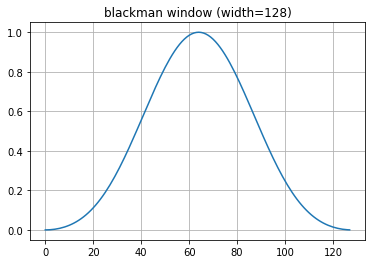

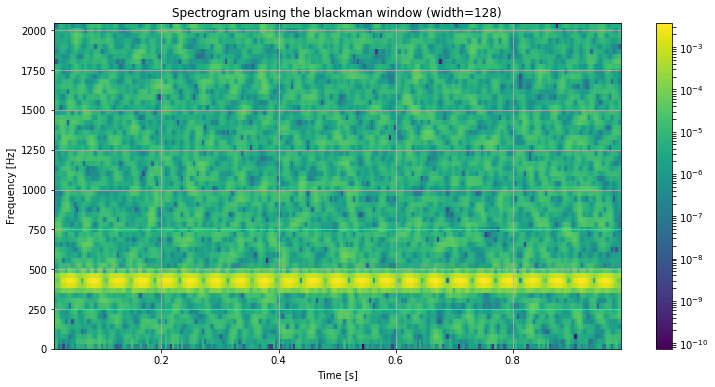

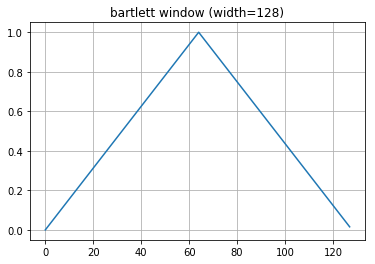

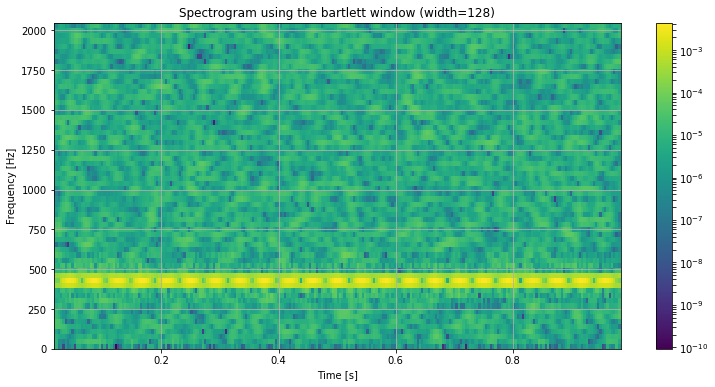

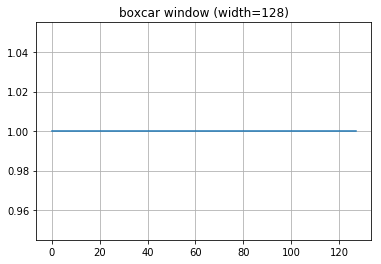

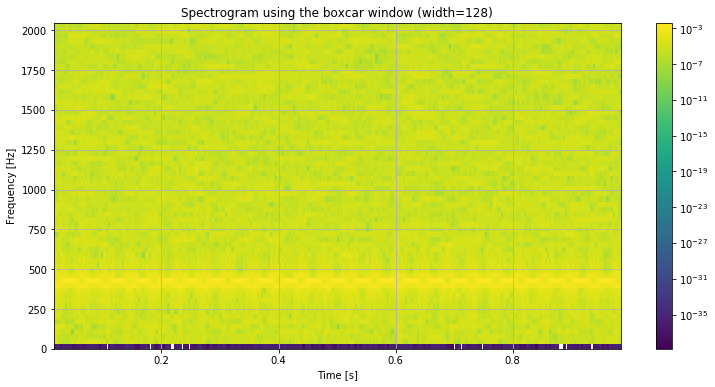

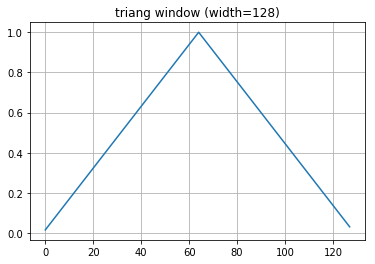

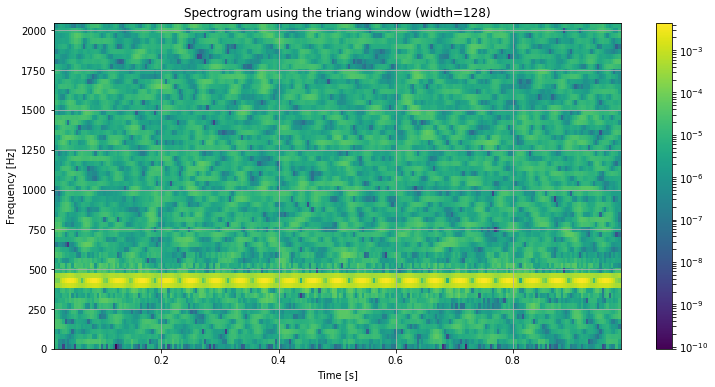

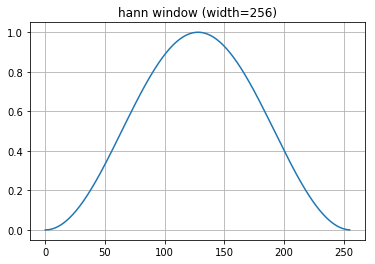

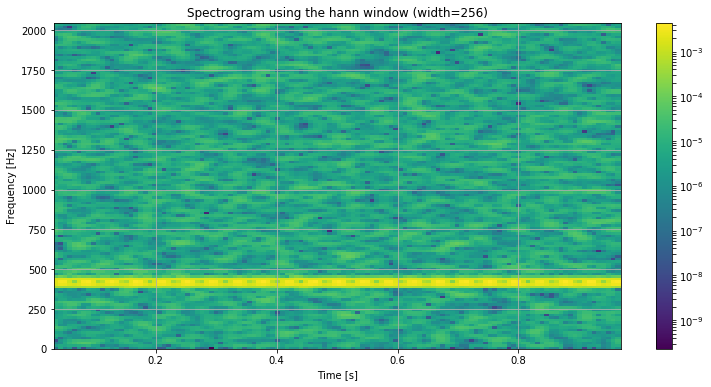

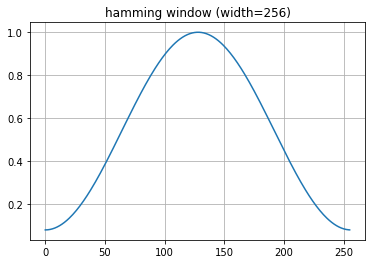

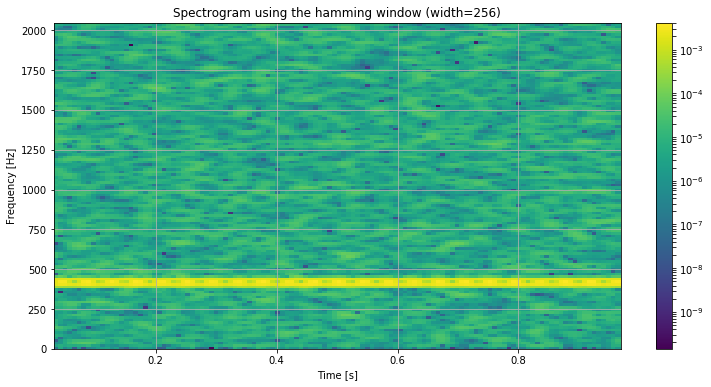

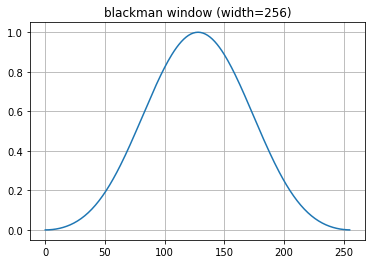

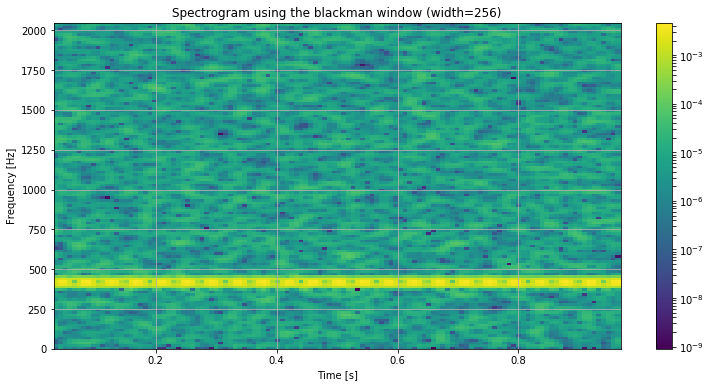

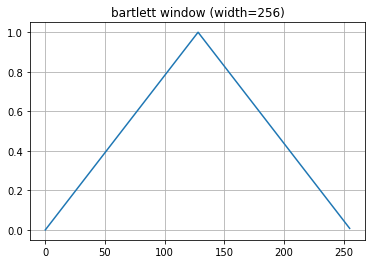

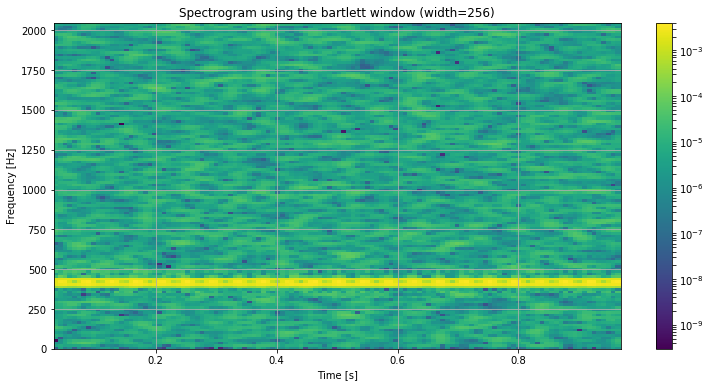

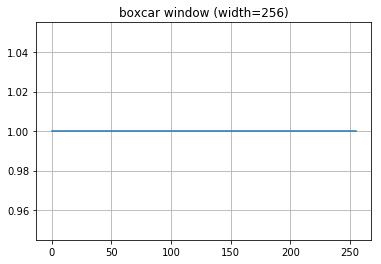

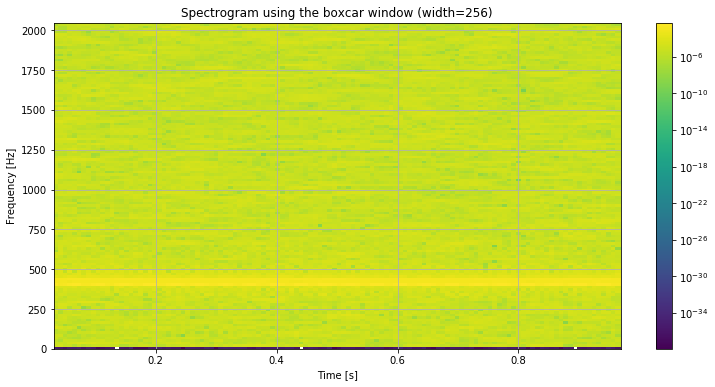

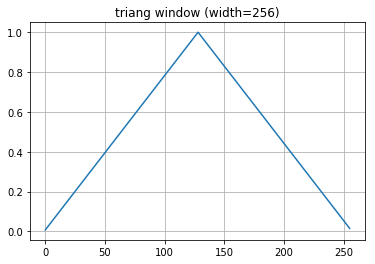

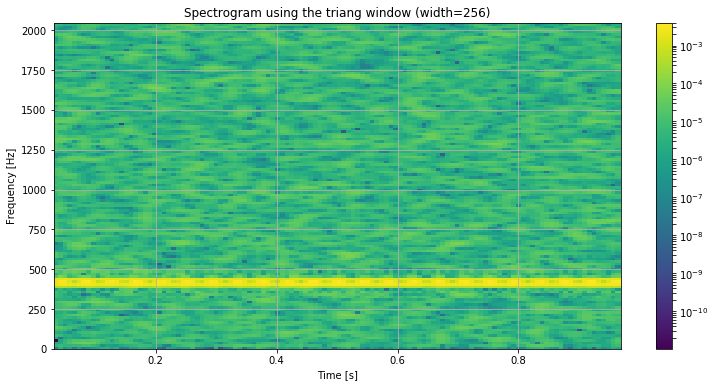

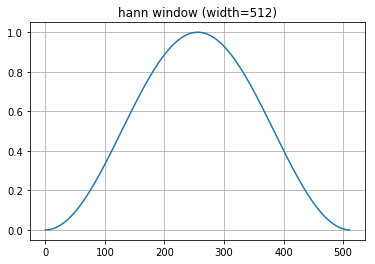

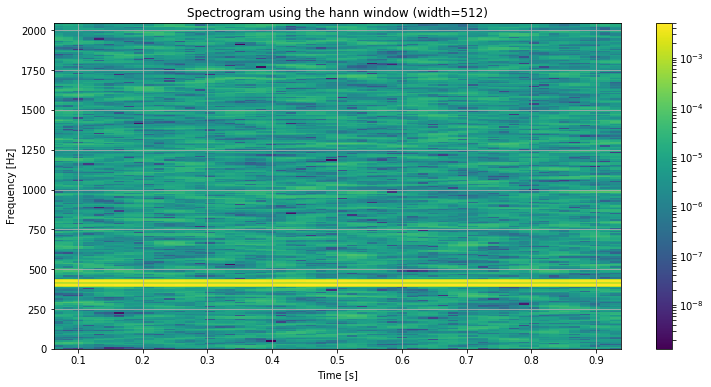

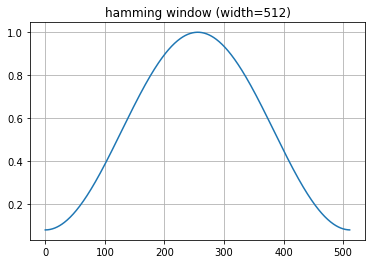

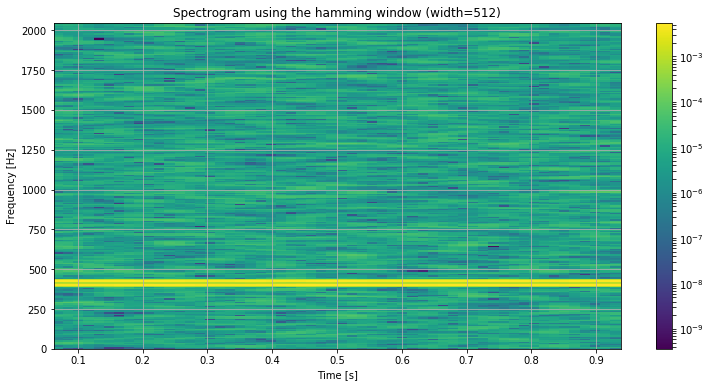

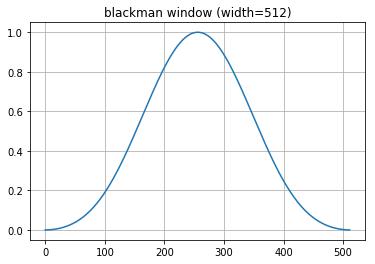

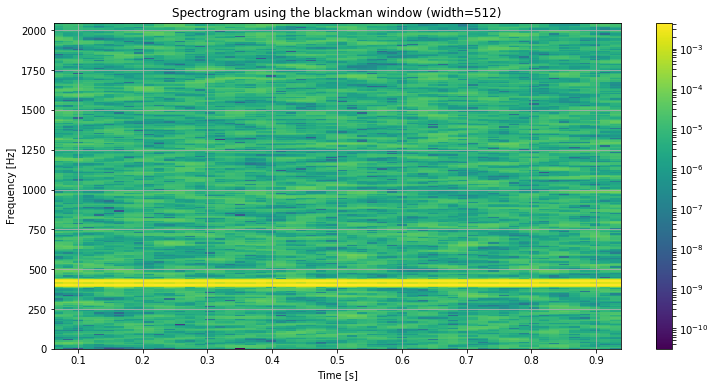

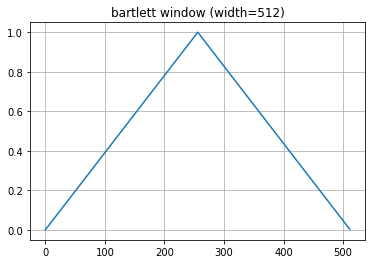

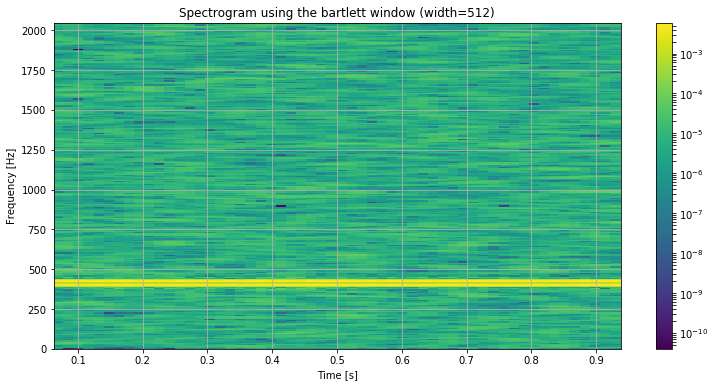

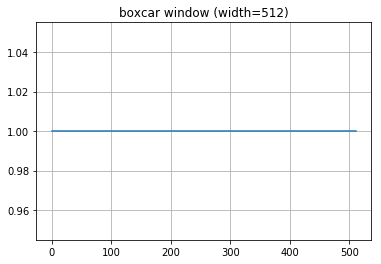

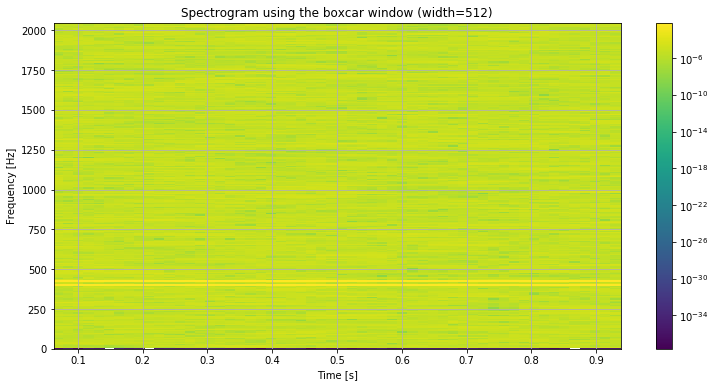

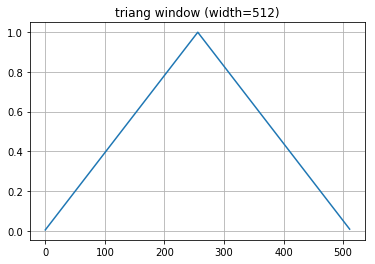

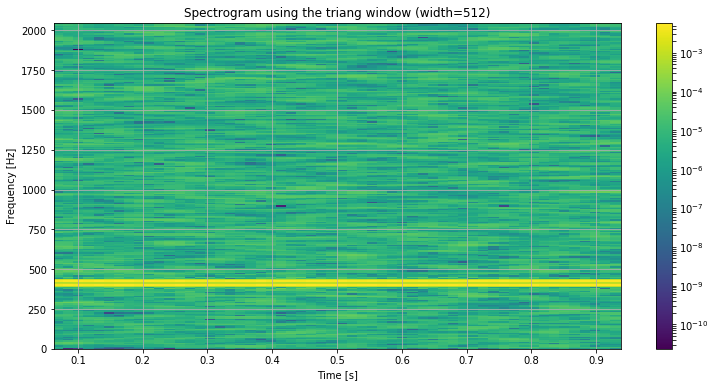

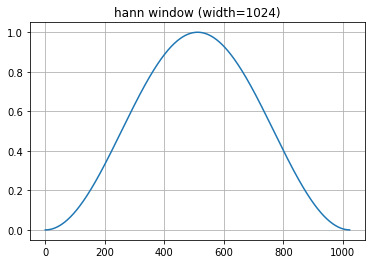

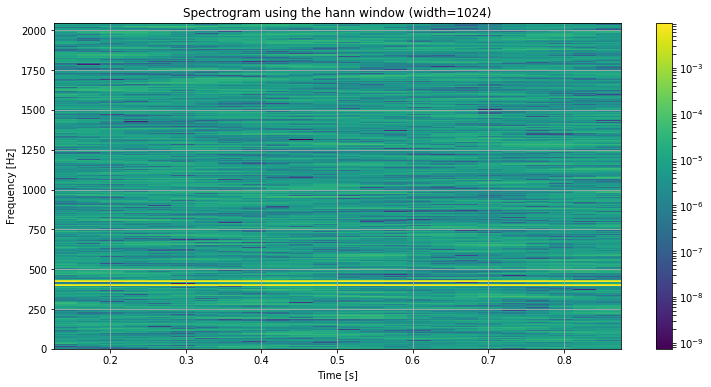

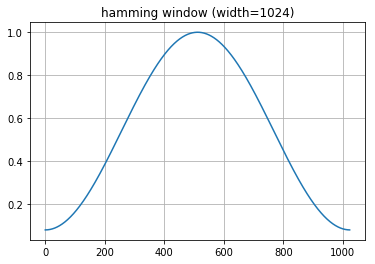

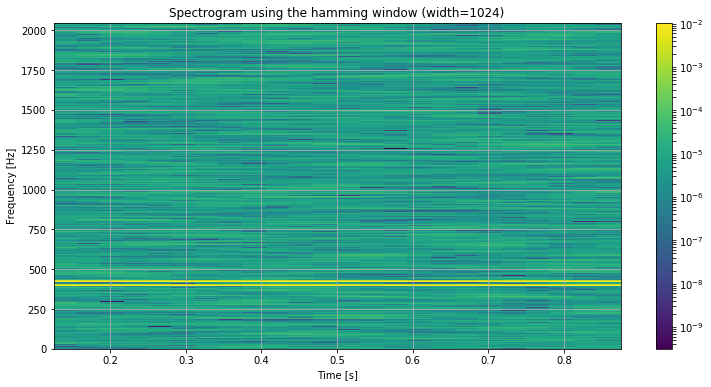

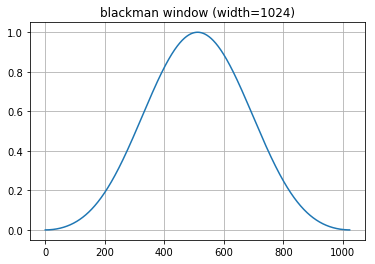

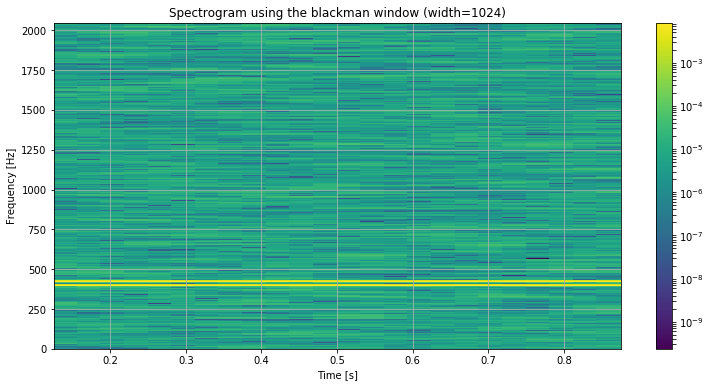

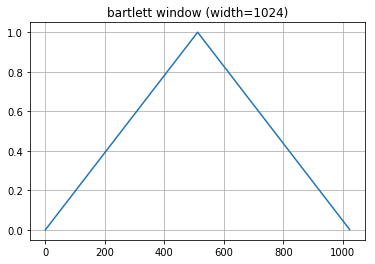

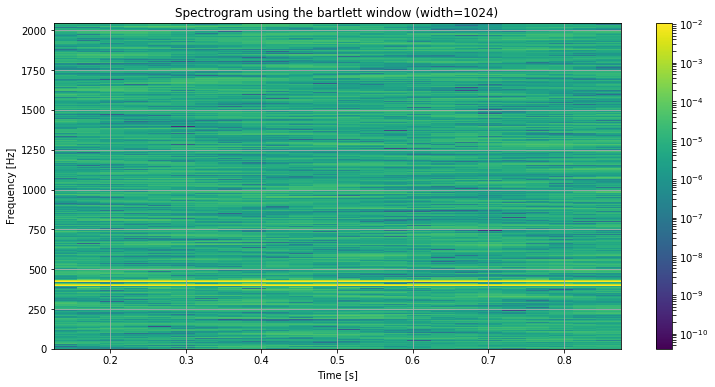

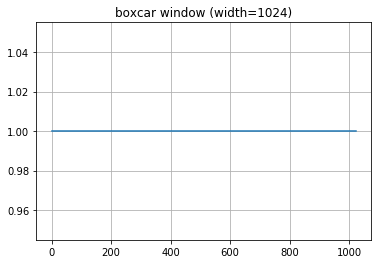

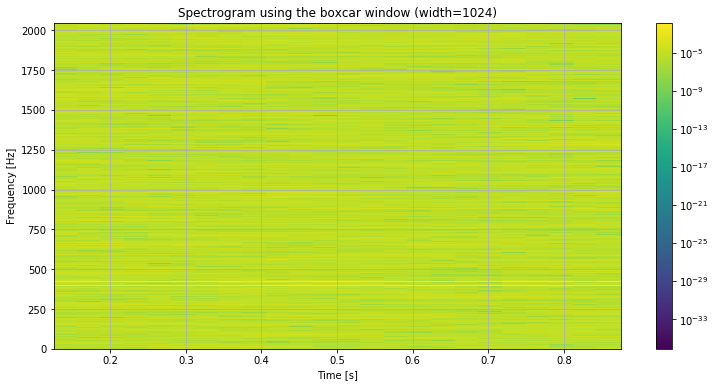

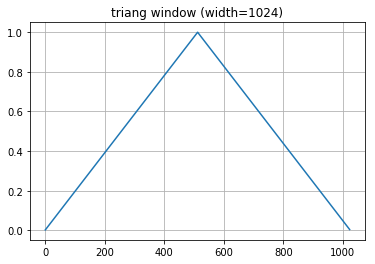

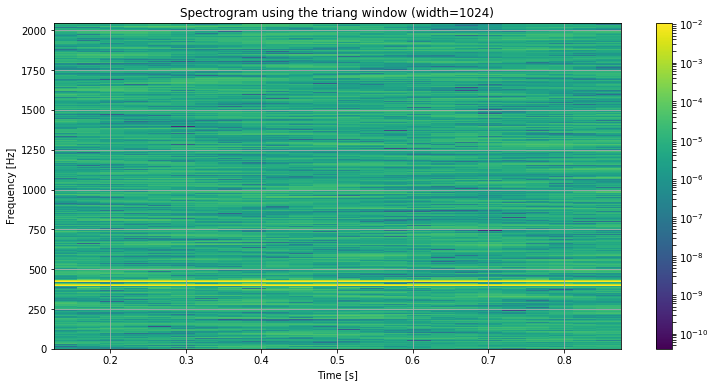

In [36]:
# Load signal x
data = loadmat('signal_2sinus.mat') # load the signal x and the list of sampling time instants (sampling frequency Fe)

t = data['t'][0]
x = data['x'][0]
fs = data['Fe'][0][0]

figure(figsize=(10,5))
plot(t,x)
xlabel(r'$t$ [s]',FontSize=18)
ylabel(r'$x(t)$',FontSize=18)
show()

# Listen
sd.play(x,fs)


for i in [128,256,512,1024]:
    for j in ['hann', 'hamming', 'blackman', 'bartlett','boxcar', 'triang']:
        width = i  # we usually use a power of 2
        spacing = width/8
        w=get_window(j, width)
        plot(w)
        title(j+' window (width='+str(i)+')')
        grid()
        show()
        figure(figsize=(12.7,6))
        f_Sy1, t_Sy1, Sy1 = spectrogram(x, fs, window=j, nperseg=width, noverlap=width-spacing)
        ax=pcolormesh(t_Sy1, f_Sy1, Sy1, norm=LogNorm()) 
        ylabel('Frequency [Hz]')
        xlabel('Time [s]')
        title('Spectrogram using the '+j+' window (width='+str(i)+')')
        grid()
        colorbar()
        show()

1. We tested several windows (Hann, Hamming, Blackman, Boxcar, Triangular). All windows show the two frequencies clearly at a width of 1024, but the Boxcar window was the only one that showed the two frequencies clearly at a width of 512 (even if the contrast with the rest of the spectrogram isn't great). With a bigger width, the resolution in the frequency domain is smaller, so we can see the details more clearly. This is due to the fact that the frequency domain is discretized by dividing the sampling frequency by window width.

2. We observe 2 frequencies very close to one another. The first one is about 420 Hz and the second one is about 440 Hz. The spectrograms show that, appart from the two main frequencies, there aren't any other frequencies emitted with a comparable amplitude.

### Time-frequency analysis of hyperbolic chirps

In this section, we consider the superposition of 2 "chirps", *i.e.*, signals whose frequency varies continuously, in a hyperbolic way (see the help of the `chirp` function in Python). As a result, we face a resolution problem, since the width of the window is constant for the entire signal, and may thus not be suitable for all the time instants.

The ultrasonic cries produced by bats typically have a similar structure, as well as gravitational waves observed in astrophysics.

In [37]:
#chirp(t, f0, t1, f1[, method, phi, vertex_zero])	Frequency-swept cosine generator.
fs = 4096
T = 3
f1_min, f1_max = 200, 1600
f2_min, f2_max = 250, 1650

t = linspace(0, 3, fs*T) 
y1 = chirp(t,f1_min,T,f2_max,method = 'hyperbolic')
y2 = chirp(t,f2_min,T,f2_max,method = 'hyperbolic')
y = y1+y2

sd.play(y,fs)   # let's play the sound

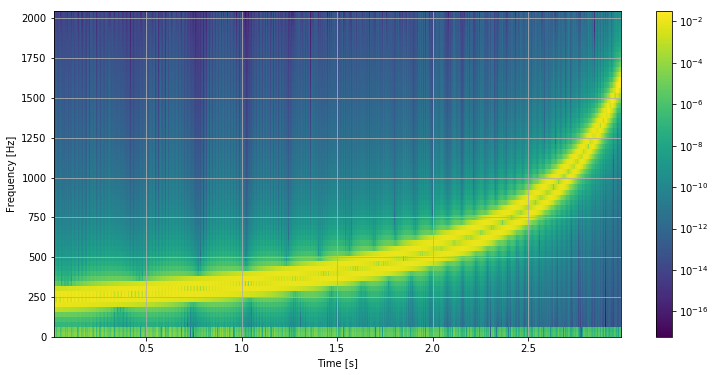

In [38]:
width = 128
window = get_window('hann',width)

figure(figsize=(12.7,6))
f_Sy, t_Sy, Sy = spectrogram(y, fs=fs, window=window, nperseg=width, noverlap=7*width/8)
pcolormesh(t_Sy, f_Sy, Sy, norm=LogNorm()) # the top of the spectrogram corresponds to the high frequencies
ylabel('Frequency [Hz]')
xlabel('Time [s]')
grid()
colorbar()
show()

### Exercice 6 <a id="ex6"></a> [[back to top]](#content)

1. Observe the results obtained by the above analysis. What is the nature of this signal?
2. Observe the quality of the spectrogram using different windows. Modify the width of the window, and highlight situations where the spectrogram allows or doesn't allow the different components of the signal to distinguished.

1. The spectrogram shows a signal with 2 main frequencies but, contrary to the previous exercise, the frequencies vary with time. The frequencies are very close to each other, and seem to overlap by the end of the observed signal.

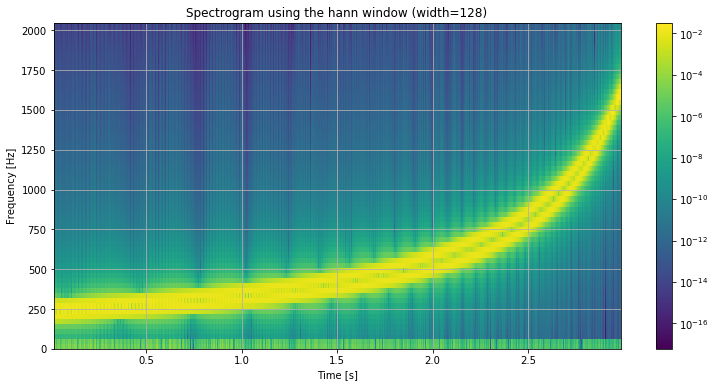

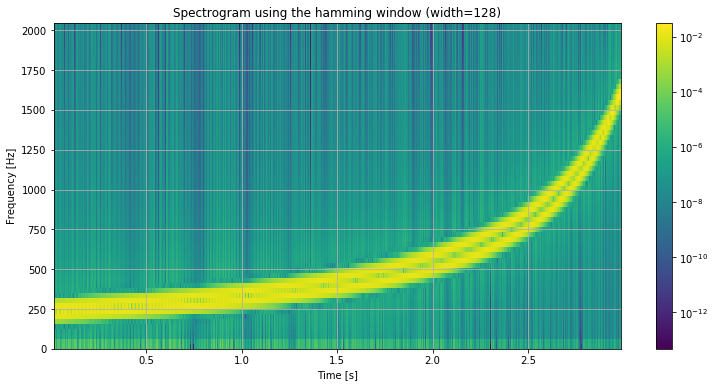

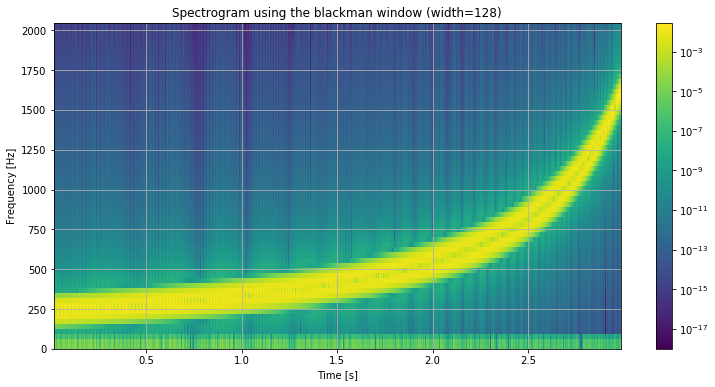

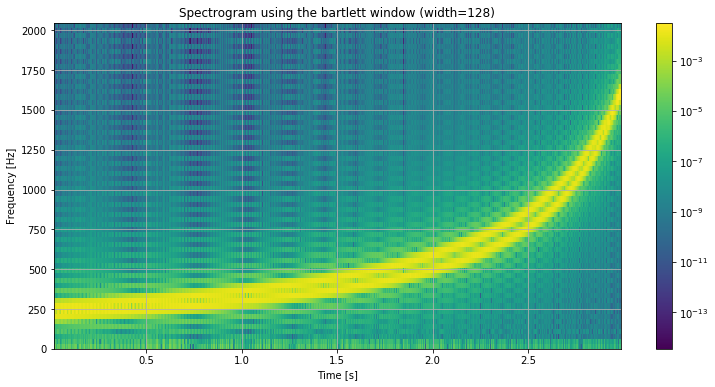

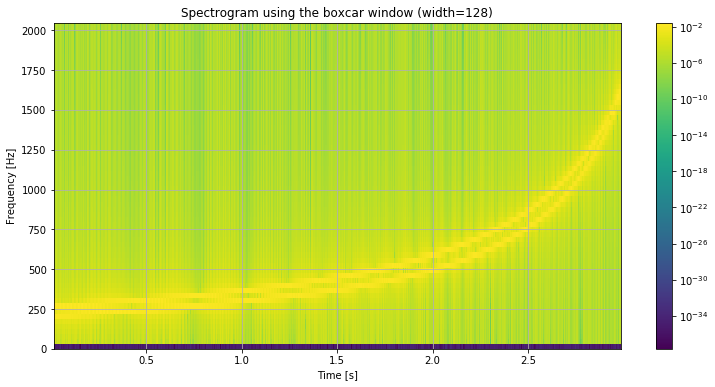

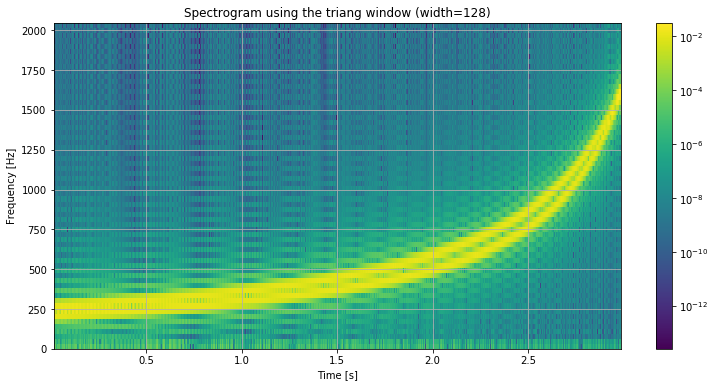

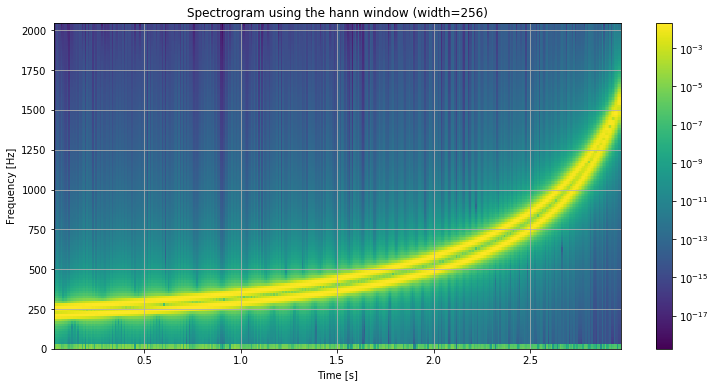

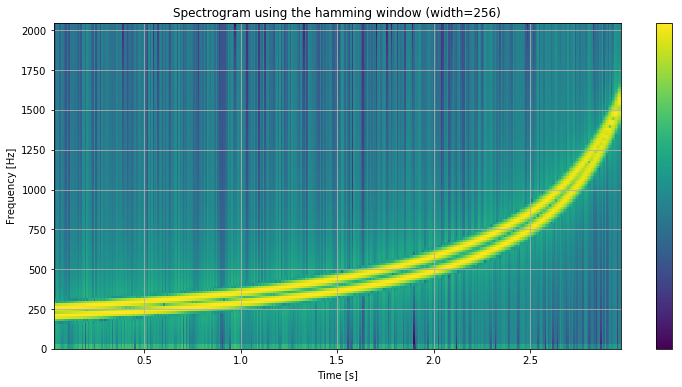

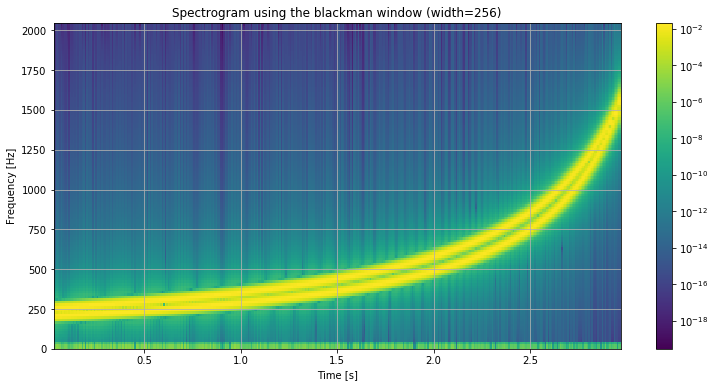

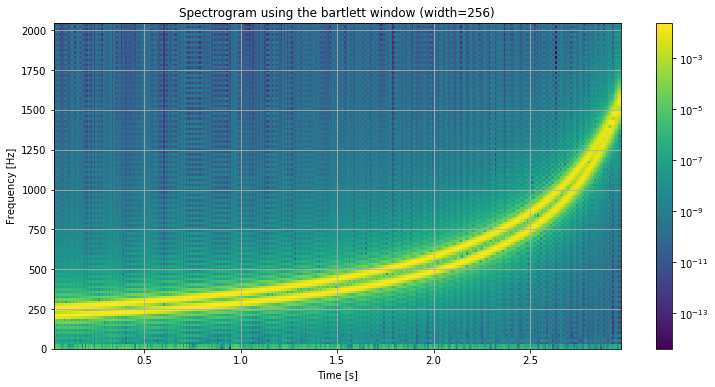

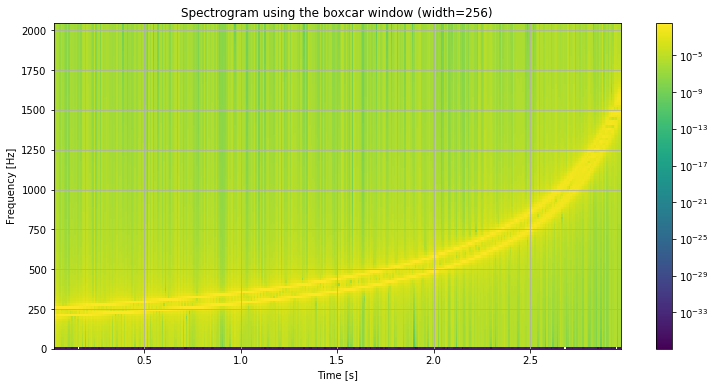

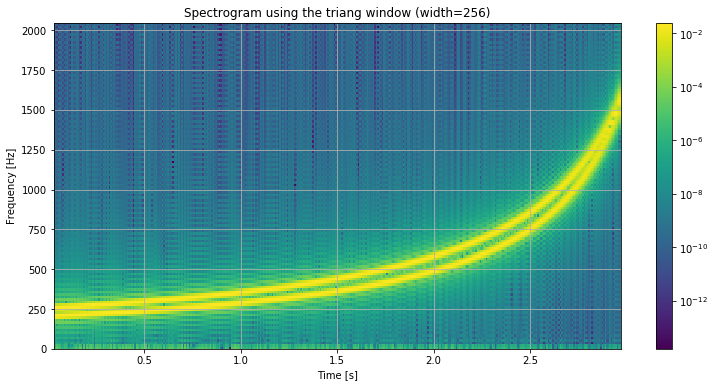

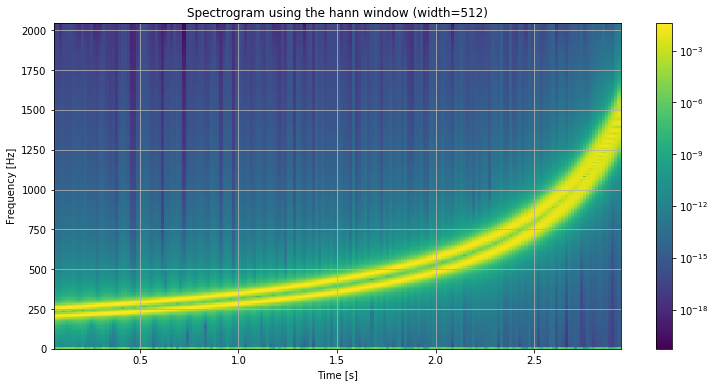

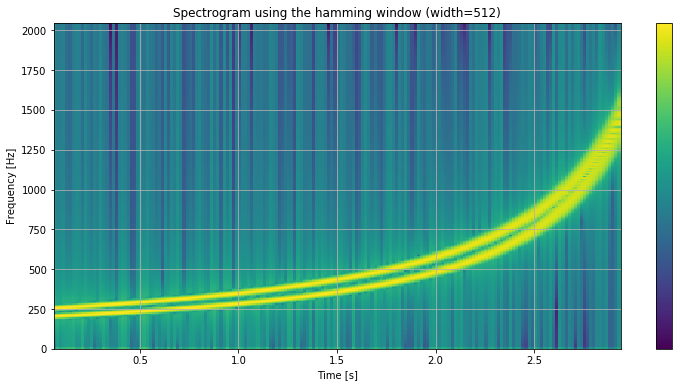

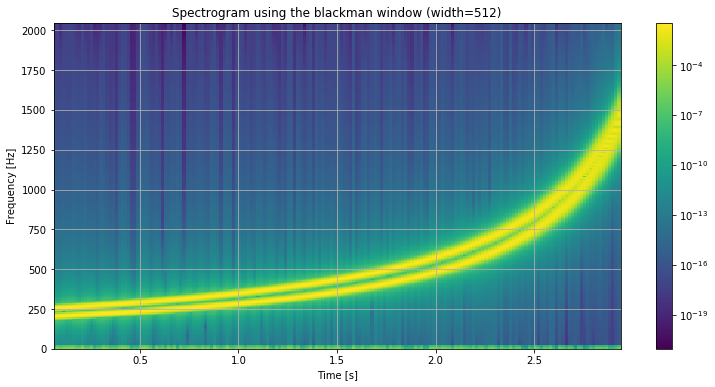

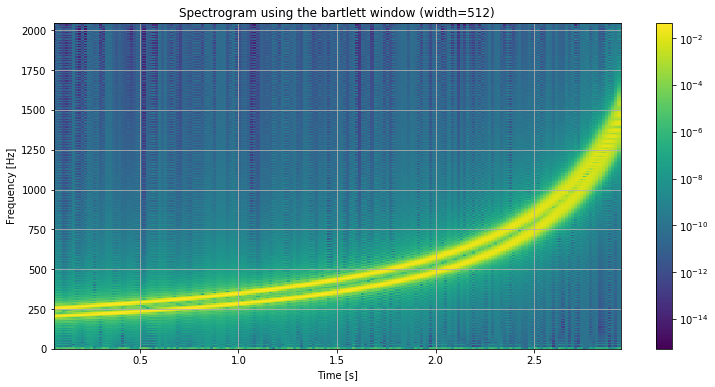

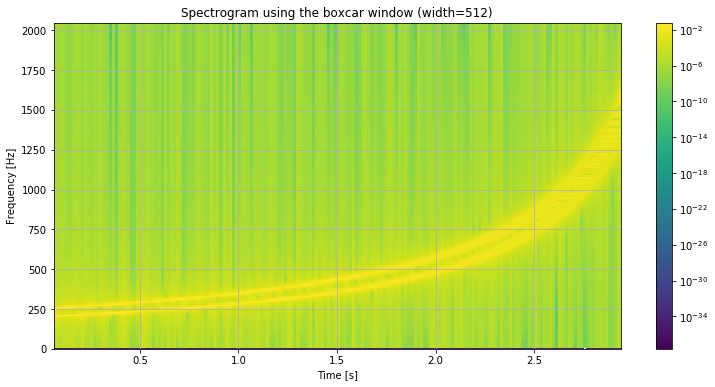

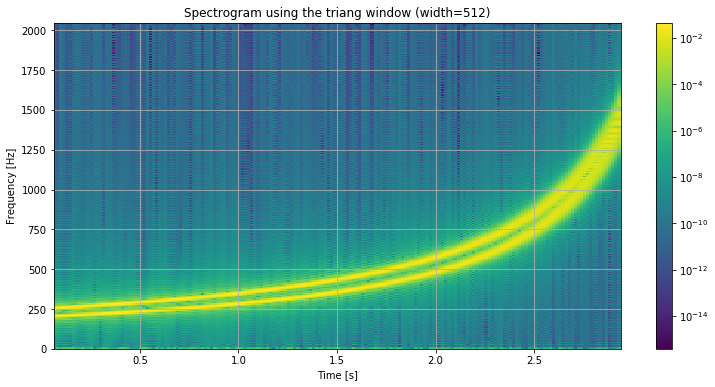

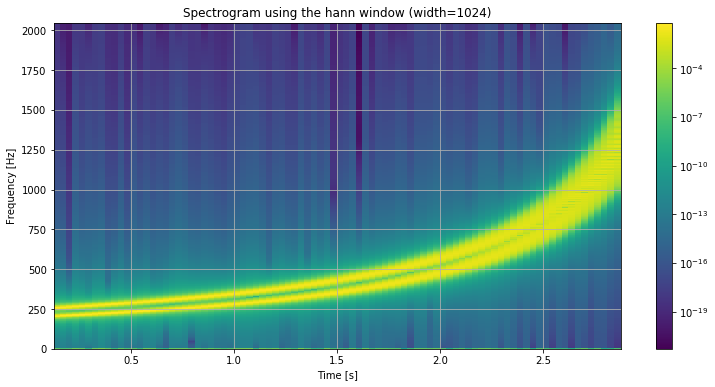

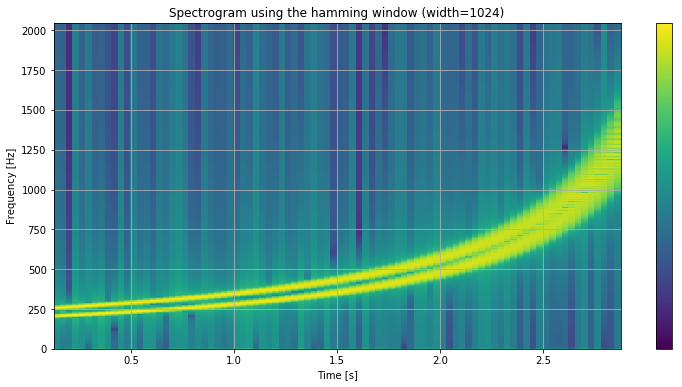

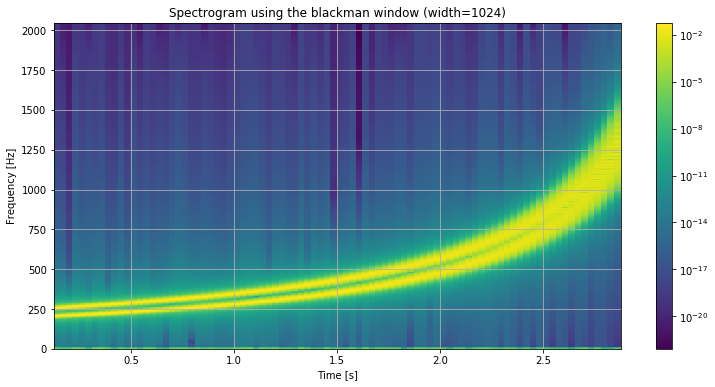

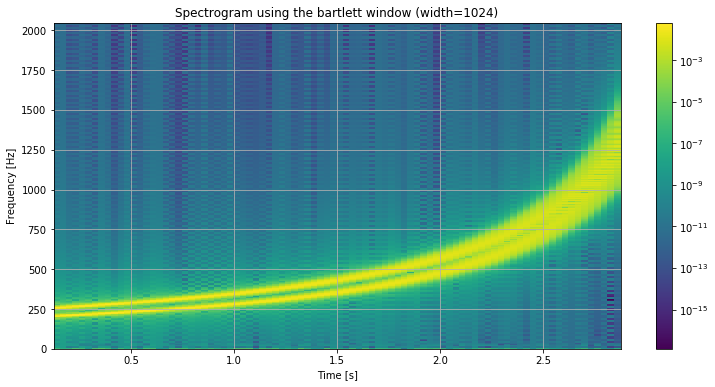

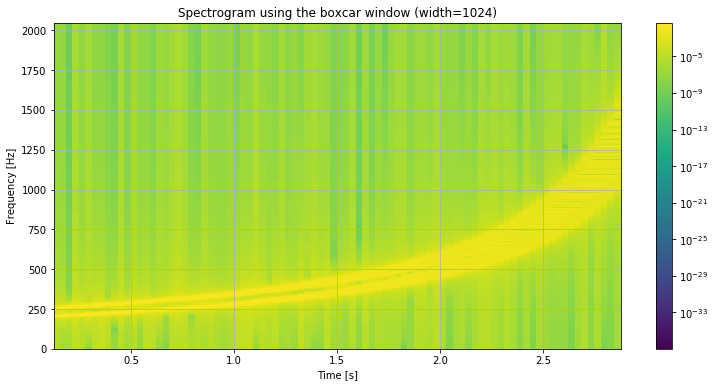

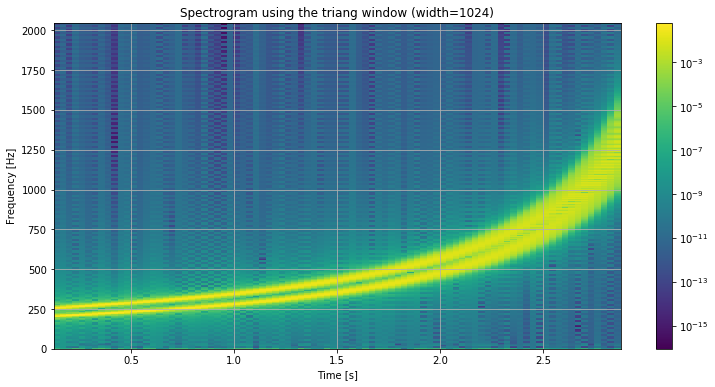

In [39]:
fs = 4096
T = 3
f1_min, f1_max = 200, 1600
f2_min, f2_max = 250, 1650

t = linspace(0, 3, fs*T) 
y1 = chirp(t,f1_min,T,f2_max,method = 'hyperbolic')
y2 = chirp(t,f2_min,T,f2_max,method = 'hyperbolic')
y = y1+y2



for i in [128,256,512,1024]:
    for j in ['hann', 'hamming', 'blackman', 'bartlett','boxcar', 'triang']:
        width = i
        window = get_window(j,width)

        figure(figsize=(12.7,6))
        f_Sy, t_Sy, Sy = spectrogram(y, fs=fs, window=window, nperseg=width, noverlap=7*width/8)
        pcolormesh(t_Sy, f_Sy, Sy, norm=LogNorm()) # the top of the spectrogram corresponds to the high frequencies
        ylabel('Frequency [Hz]')
        xlabel('Time [s]')
        title('Spectrogram using the '+j+' window (width='+str(i)+')')
        grid()
        colorbar()
        show()

2. With all types of windows, for a bigger window width, the highest frequencies at the end of the observed signal are blurry. On the contrary, with smaller window widths, the lowest frequencies at the beginning of the signal are blurry as well. We find a compromise at widths of 256 and 512, which allow for an acceptable resolution for the entire signal. Moreover, the type of window that seems to work best is the Hamming window.

## Appendix: time-frequency atoms using the Hanning window <a id="appendix"></a> [[back to top]](#content)

Each coefficient of the STFT could be seen as the scalar product of the signal of interest and a time-frequency atom. Atoms are obtained by shifting the basic window into time and frequency (amplitude modulation). We represent here some atoms obtained from the Hanning window.

Examples of atoms using Hann's window: observe the effect of translations in time and frequency.

In [40]:
w = 256 # 
fs = 1024 # sampling frequency

t = arange(-w/2,3*w-1,1)/fs # set of reference instants for atom at 0
t1 = 0.4 #t[-1]-1.3*w/fs    # set of instants for 2 * w translated atom
f = 8/w*fs # frequency different from zero in g3 to g6

# Position 0, frequency 0 (measures the contribution of a local offset
g1 = (cos(pi*t*fs/w)**2)*double(abs(t)<w/fs/2)
                            
# Position t1, frequency 0
g2 = (cos( pi*(t-t1)*fs/w )**2)*double( abs(t-t1)<w/fs/2 )  

# Position 0, frequency f
g3 = g1 * cos(2*pi*f*t) # frequency translation <=> amplitude modulation

# Position t1, frequency f
g4 = g2 * cos(2*pi*f*t)

# Position 0, frequency 2*f
g5 = g1 * cos(2*pi*2*f*t)

# Position t1, frequency 2*f
g6 = g2 * cos(2*pi*2*f*t)

#### Displaying the windows

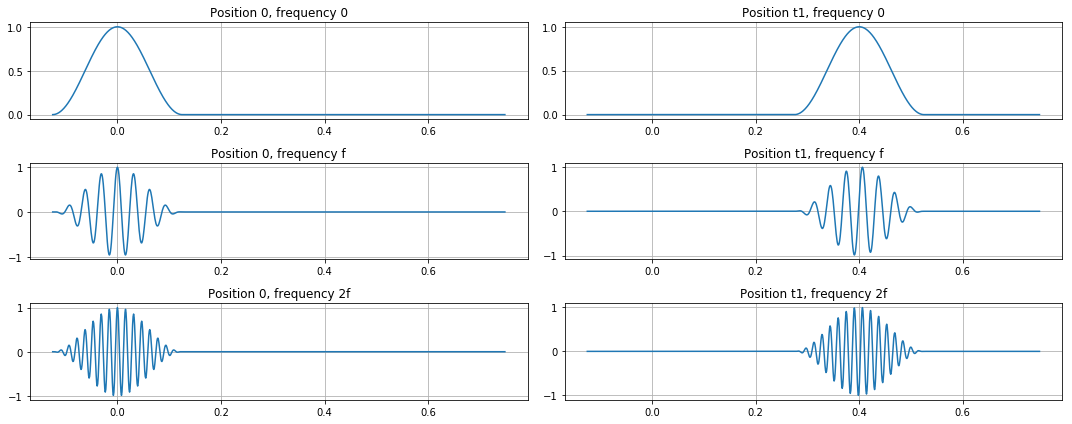

In [41]:
figure(figsize=(15,6))

pos=('0', 't1', '0', 't1', '0', 't1')
fr = ('0', '0', 'f', 'f', '2f', '2f')

for i in range(6):
    subplot(3,2,i+1)
    eval('plot(t,g' + str(i+1) + ')')
    title('Position ' + pos[i]+', frequency ' + fr[i])
    grid()
    
tight_layout()
show()

### In the time-frequency plane for an atom at time t1 and frequency 10f :

Atoms above are easy to represent graphically but not easy to listen to. Let's increase the frequency up to an audible level of a few hundred Hz:

In [27]:
y = g2 * cos(2*pi*10*f*t)

#### What an atom sounds  like? Let's listen to `y`:

In [28]:
sd.play(y,fs)

#### What an atom looks like in the time-frequency plane ?

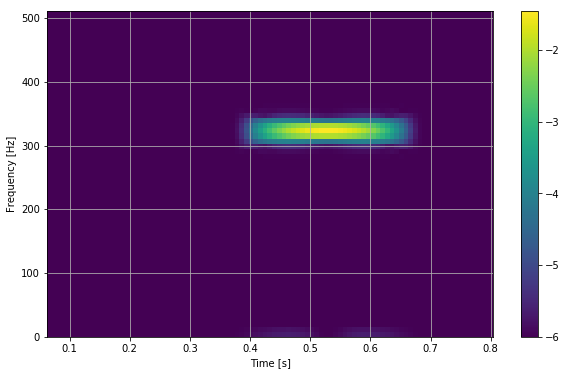

In [29]:
width = 128
window = get_window('hann',width)

figure(figsize=(10,6))
f_Sy, t_Sy, Sy = spectrogram(y, fs=fs, window=window, nperseg=width, noverlap=15*width/16)
pcolormesh(t_Sy, f_Sy, log10(Sy+1e-6)) # the top of the spectrogram then corresponds to the high frequencies
ylabel('Frequency [Hz]')
xlabel('Time [s]')
grid()
colorbar()
show()